# **Project Name**    -  Bike Sharing Demand Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Bike Seoul is like a bike sharing service in Seoul, South Korea. You can borrow bikes from different spots in the city and return them at any of these spots. It's a way to get around the city without a car and helps reduce traffic. Lots of people are using these bikes now, so we need to figure out the best way to make sure there are enough bikes where people want them. Predicting when people will want bikes is important so we don't waste money or bikes.

The main objective of this project is to develop a machine learning model that can accurately predict the demand for bike rentals in Seoul, South Korea, based on historical data and various relevant factors such as weather conditions, time of day, and public holidays. In this project we have used regression analysis techniques to model the bike demand data. The model trained on a large dataset of past bike rental information, along with relevant weather and time data. The model then be tested and evaluated using metrics such as mean squared error and r-squared values. The actual data is from the Seoul city government's open data portal, and this dataset is also available on Kaggle.

So, our main goal was to achieve an accuracy of at least 85% in the bike demand predictions, which would help the city's bike sharing service providers plan their fleet operations more effectively and respond to demand changes in real-time. We have performed lots of regression algorithms like linear regression, random forest, decision tree and gradient boosting,also we tried to do hyperparameter tuning and cross validation to improve the accuracy of the model and finally we have decided to select Gradient boosting algorithm because it gave us high accuracy 90% on Gradient boosting.

This project not only provided valuable insights into bike demand patterns in Seoul but also demonstrated the practical applications of machine learning in addressing real-world problems. The findings could potentially be extended to other cities with similar bike sharing systems, leading to improved services for bike users and more sustainable transportation systems.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In numerous urban areas, rental bikes have been introduced to improve the convenience of mobility. Ensuring the timely availability and accessibility of these rental bikes to the public is of paramount importance, as it reduces waiting times. Consequently, ensuring a consistent and adequate supply of rental bikes to the city emerges as a significant challenge. The critical aspect involves forecasting the hourly demand for bike counts to maintain a stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

C:\Users\Aditi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Dataset Loading

In [2]:
df=pd.read_csv('SeoulBikeData.csv',encoding='unicode_escape')

### Dataset First View

In [3]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [4]:
print("Total no. of rows ",df.shape[0])
print("Total no. of columns ",df.shape[1])

Total no. of rows  8760
Total no. of columns  14


### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [6]:
print("There are {} duplicates present.".format(df.duplicated().sum()))

There are 0 duplicates present.


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

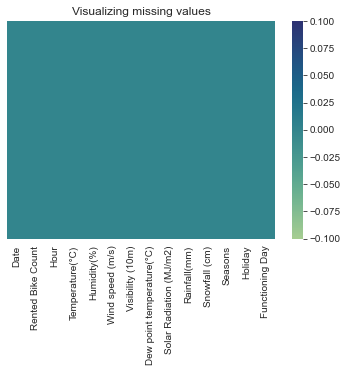

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cmap="crest",yticklabels=False)
plt.title("Visualizing missing values",fontsize=12)
plt.show()

### What did you know about your dataset?

- Our dataset contains 8760 rows and 14 columns
- We do not have null values in dataset

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

- **Date** - Date
- **Rented Bike Count** - Count of bikes rented at each hour
- **Hour** - Hour of the day
- **Temperature(°C)** - Temprature of the day
- **Humidity(%)** - Humidity measure
- **Wind speed (m/s)** - Wind speed
- **Visibility (10m)** - Visibility measure 
- **Dew point temperature(°C)** - Dew point temperature measure
- **Solar Radiation (MJ/m2)** - Solar Radiation measure
- **Rainfall(mm)** - Rainfall in mm
- **Snowfall (cm)** - Snowfall measure
- **Seasons** - Seasons
- **Holiday** - Whether a holiday or not
- **Functioning Day** - Whether a functioning day or not

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique().sort_values(ascending=True)

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
#Rename the complex columns name
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Weekday']=df['Date'].dt.day_name()

In [15]:
df=df.astype({'Day':'category','Month':'category','Year':'category',"Hour":'category'})

In [16]:
df.drop(['Date'],axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Day                    8760 non-null   category
 14  Month                  8760 non-null   c

In [18]:
df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day Day Month  Year   Weekday  
0  No Holiday             Yes  12     1  2017  Thursday  
1  No Holiday             Yes  12     1  2017  Thursday  
2  No Holiday             Yes  12     1  2017  Thursday  
3  No Holiday             Yes  12     1  2017  Thursday  
4  No Holiday             Yes  12     1  2017  Thursday

In [19]:
# Assingning numericals column of df to variable numerical_cols
numerical_cols = list(df.describe())
numerical_df = df[numerical_cols]
numerical_df.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                  -17.6              0.0       0.0       0.0  
1                  -17.6              0.0       0.0       0.0  
2                  -17.7              0.0       0.0       0.0  
3                  -17.6              0.0       0.0       0.0  
4                  -18.6              0.0       0.0       0.0

In [20]:
# Assigning catagoricals column of df to variable catagorical_cols
categorical_cols=list(set(df.columns)-set(numerical_cols))
categorical_df=df[categorical_cols]
categorical_df.head()

Year Day Functioning_Day     Holiday Hour   Weekday Seasons Month
0  2017  12             Yes  No Holiday    0  Thursday  Winter     1
1  2017  12             Yes  No Holiday    1  Thursday  Winter     1
2  2017  12             Yes  No Holiday    2  Thursday  Winter     1
3  2017  12             Yes  No Holiday    3  Thursday  Winter     1
4  2017  12             Yes  No Holiday    4  Thursday  Winter     1

### What all manipulations have you done and insights you found?

- The Date column has its dtype as object, we had changd the dtype from object to datetime.
- From the Date column, 'year','month','day' and 'weekday' columns are created.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

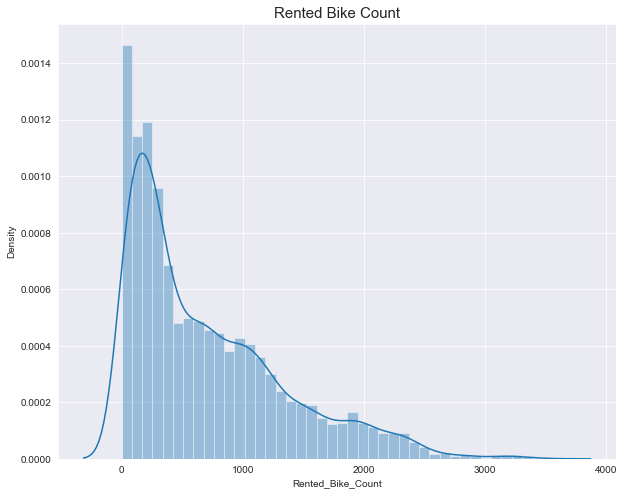

In [21]:
# Chart - 1 visualization code
plt.figure(figsize=(10,8))
sns.distplot(df['Rented_Bike_Count'])
plt.title('Rented Bike Count',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

A distplot is useful because it provides a quick and easy way to check the distribution of the data. It also allows to check if the data is following normal distribution or not.

##### 2. What is/are the insight(s) found from the chart?

The distribution is right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definately from this insight we got to know that our data is not normally distributed so, before doing or implementing any model on this data we need to normalise this data.

#### Chart - 2

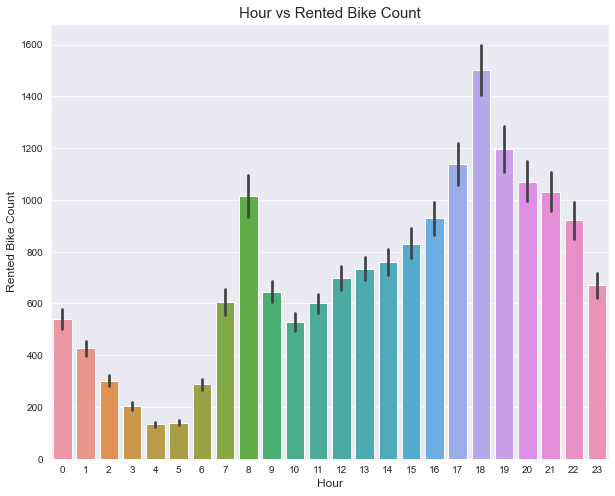

In [22]:
# Chart - 2 visualization code
plt.figure(figsize=(10,8))
sns.barplot(x='Hour',y='Rented_Bike_Count',data=df)
plt.title('Hour vs Rented Bike Count',fontsize=15)
plt.xlabel('Hour',fontsize=12)
plt.ylabel('Rented Bike Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. 

To show the distribution of Rented Bike Count with Hour

##### 2. What is/are the insight(s) found from the chart?

In hour vs rented bike chart there is high demand in the morning 8'o clock and evening 18'o clock

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are going to provide some positive business impact, beacause analysing the demand on the basis of categorical variable we got know that when demand for bike is more so we can focus more on that portion.

#### Chart - 3

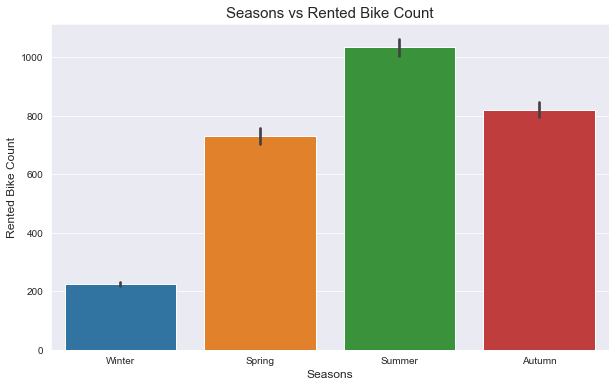

In [23]:
# Chart - 3 visualization code
plt.figure(figsize=(10,6))
sns.barplot(x='Seasons',y='Rented_Bike_Count',data=df)
plt.title('Seasons vs Rented Bike Count',fontsize=15)
plt.xlabel('Seasons',fontsize=12)
plt.ylabel('Rented Bike Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

To show the distribution of Rented Bike Count with Seasons

##### 2. What is/are the insight(s) found from the chart?

The demand of bike is more in Summer season and less in Winter season

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the seasonal patterns of bike rental demand can help businesses adjust their inventory and allocate resources more efficiently. 

#### Chart - 4

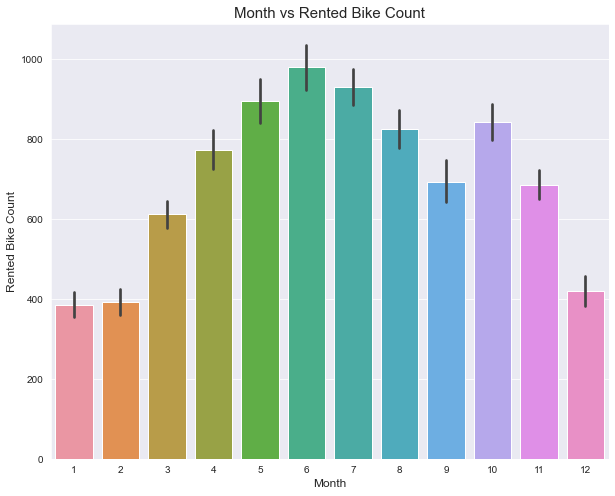

In [24]:
# Chart - 4 visualization code
plt.figure(figsize=(10,8))
sns.barplot(x='Month',y='Rented_Bike_Count',data=df)
plt.title('Month vs Rented Bike Count',fontsize=15)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Rented Bike Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

To show the distribution of Rented Bike Count with Month

##### 2. What is/are the insight(s) found from the chart?

The demand of bike is high in the month of June and less in the month of January

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

They can increase marketing and promotional activities during months with lower counts to boost sales, or conversely, focus on customer retention during peak months.

#### Chart - 5

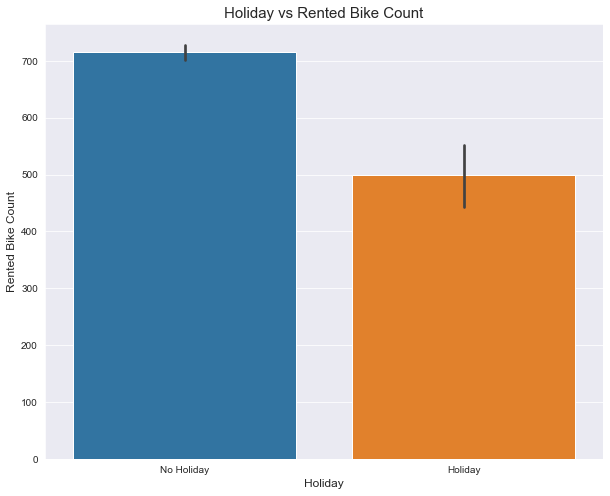

In [25]:
# Chart - 5 visualization code
plt.figure(figsize=(10,8))
sns.barplot(x='Holiday',y='Rented_Bike_Count',data=df)
plt.title('Holiday vs Rented Bike Count',fontsize=15)
plt.xlabel('Holiday',fontsize=12)
plt.ylabel('Rented Bike Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

The bar plot allows for a direct visual comparison between the "Holiday" categories based on the "Rented_Bike_Count

##### 2. What is/are the insight(s) found from the chart?

There is high demand on working days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of "No Holiday" and "Holiday" periods can assist a business in resource allocation. They can allocate staff, inventory, and marketing efforts differently during holiday and non-holiday periods to maximize efficiency and sales.

#### Chart - 6

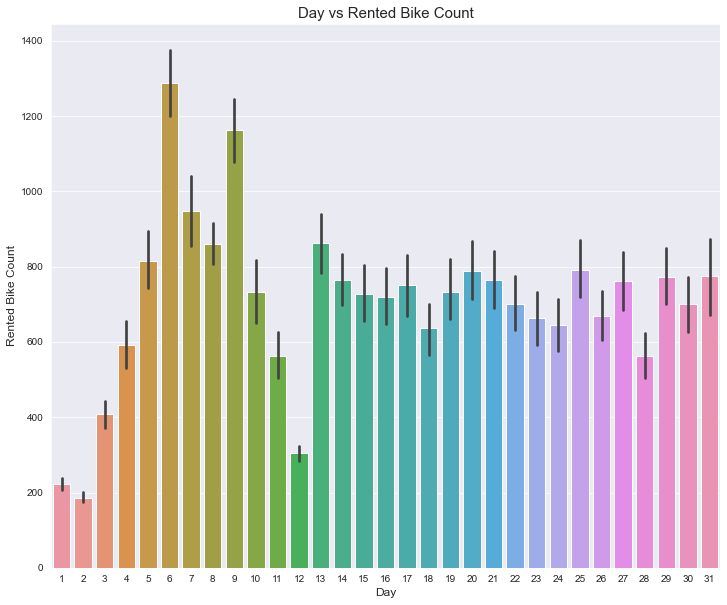

In [26]:
# Chart - 6 visualization code
plt.figure(figsize=(12,10))
sns.barplot(x='Day',y='Rented_Bike_Count',data=df)
plt.title('Day vs Rented Bike Count',fontsize=15)
plt.xlabel('Day',fontsize=12)
plt.ylabel('Rented Bike Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

To show the distribution of Rented Bike Count with Day

##### 2. What is/are the insight(s) found from the chart?

The demand is high on day 6 and less on day 1 and 2

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing these counts can help businesses forecast demand accurately. They can anticipate which days are likely to have higher or lower bike rental demand, allowing for better resource allocation and inventory management.

#### Chart - 7

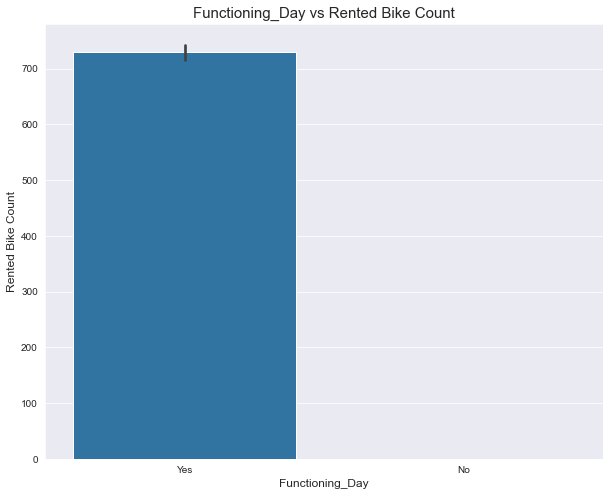

In [27]:
# Chart - 7 visualization code
plt.figure(figsize=(10,8))
sns.barplot(x='Functioning_Day',y='Rented_Bike_Count',data=df)
plt.title('Functioning_Day vs Rented Bike Count',fontsize=15)
plt.xlabel('Functioning_Day',fontsize=12)
plt.ylabel('Rented Bike Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

To show the distribution of Rented Bike Count with Functioning Day

##### 2. What is/are the insight(s) found from the chart?

There is high demand on functioning day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Analysing the demand on the basis of categorical variable we got know that when demand for bike is more so we can focus more on that portion.

#### Chart - 8

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

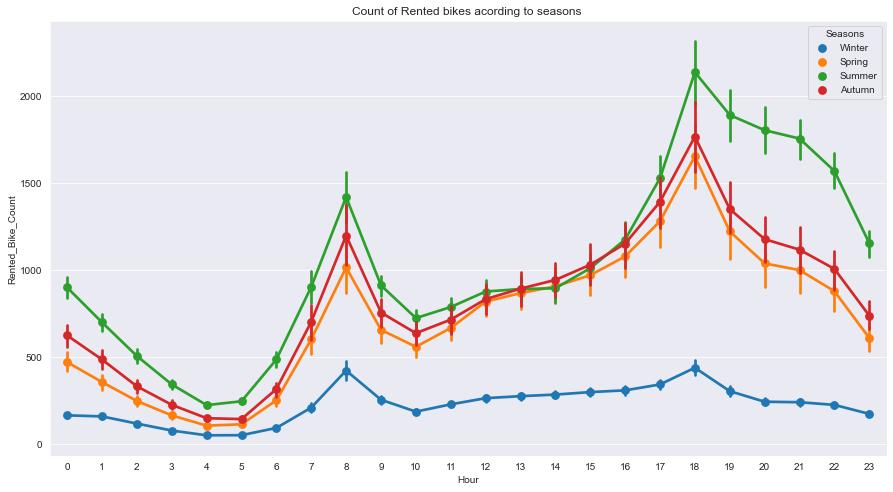

In [28]:
# Chart - 8 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.pointplot(x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax,data=df)
ax.set(title='Count of Rented bikes acording to seasons ')

##### 1. Why did you pick the specific chart?

Line plots are useful because they can quickly and easily show trends and patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

In winter season there is no significant demand even in the morning or in the evening.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this analysis we figure out some key factors such as high demand in morning and evening slot in all the seasons.

#### Chart - 9

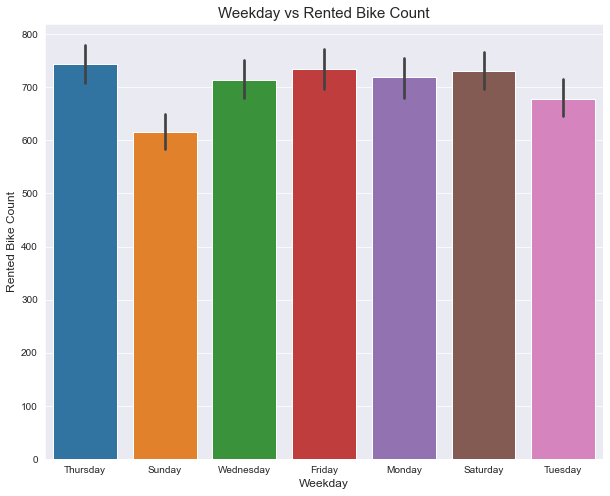

In [29]:
# Chart - 9 visualization code
plt.figure(figsize=(10,8))
sns.barplot(x='Weekday',y='Rented_Bike_Count',data=df)
plt.title('Weekday vs Rented Bike Count',fontsize=15)
plt.xlabel('Weekday',fontsize=12)
plt.ylabel('Rented Bike Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

To show the distribution of Rented Bike Count with Weekday

##### 2. What is/are the insight(s) found from the chart?

The demand of bike is less on Sunday

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing bike rental counts by weekday helps in forecasting demand accurately. Businesses can anticipate which days of the week are likely to have higher or lower bike rental demand, allowing for better resource allocation and inventory management.

#### Chart - 10

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

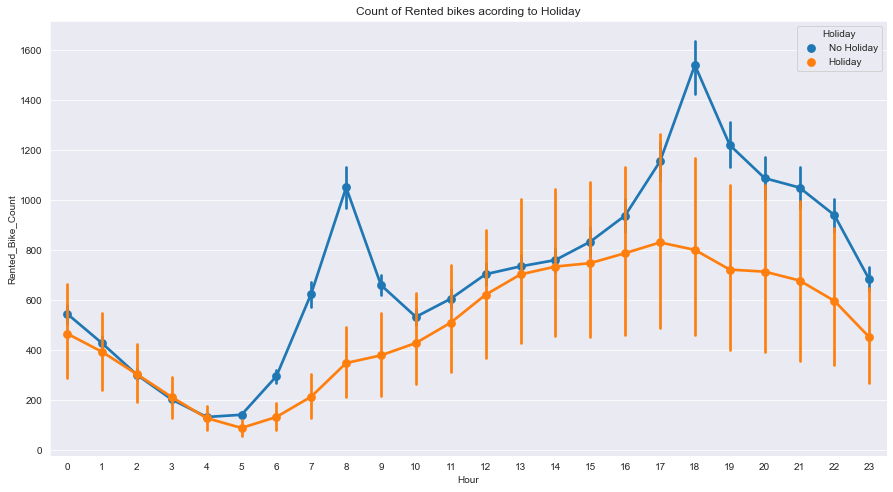

In [30]:
# Chart - 10 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.pointplot(x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax,data=df)
ax.set(title='Count of Rented bikes acording to Holiday')

##### 1. Why did you pick the specific chart?

Line plots are useful because they can quickly and easily show trends and patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

On the functional day (i.e No Holiday) there is spike in morning and in evening, but that is not there on Holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

They can optimize their resource allocation by adjusting staffing levels, inventory, and other operational aspects to align with  No Holiday and Holiday. 

#### Chart - 11

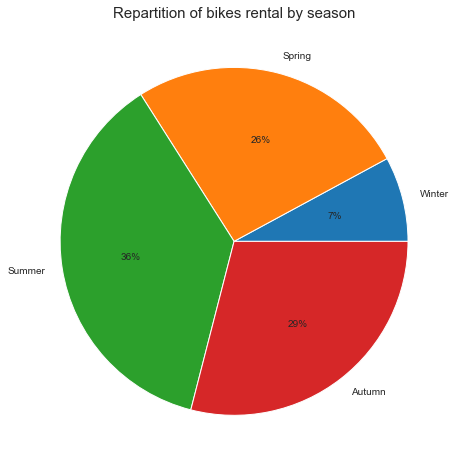

In [31]:
# Chart - 11 visualization code
Winter=df[df['Seasons']=='Winter'].sum()
Spring=df[df['Seasons']=='Spring'].sum()
Summer=df[df['Seasons']=='Summer'].sum()
Autumn=df[df['Seasons']=='Autumn'].sum()

BikeSeasons={"Winter":Winter["Rented_Bike_Count"],"Spring":Spring["Rented_Bike_Count"],"Summer":Summer["Rented_Bike_Count"],"Autumn":Autumn["Rented_Bike_Count"]}
plt.gcf().set_size_inches(8,8)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bikes rental by season", fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

So, we used pie chart to see percentage distribution of rented bike on the basis of sseasons

##### 2. What is/are the insight(s) found from the chart?

- In year data season summer contributes around 36% then autumn around 29%
- Lowest demand in winter, it contributes around only 7%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

They can focus their advertising and special offers during peak seasons to attract more customers.

#### Chart - 12

Text(0, 0.5, 'Rented_Bike_Count')

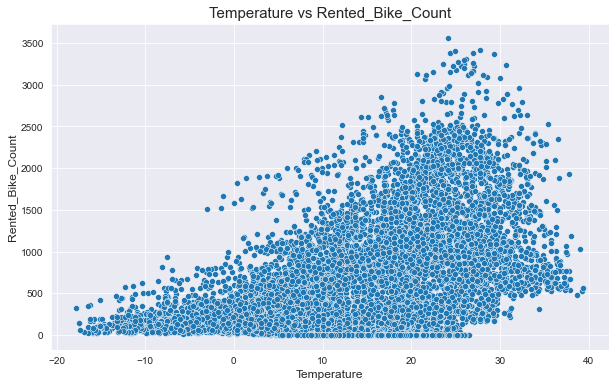

In [32]:
# Chart - 12 visualization code
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature',y='Rented_Bike_Count',data=df)
plt.title('Temperature vs Rented_Bike_Count',fontsize=15)
plt.xlabel('Temperature',fontsize=12)
plt.ylabel('Rented_Bike_Count',fontsize=12)

##### 1. Why did you pick the specific chart?

Scatter plots allow us to observe the pattern or trend between two numerical variables. 

##### 2. What is/are the insight(s) found from the chart?

 From above chart we can see that there is some linearity between temperature  with dependent variable Rented Bike Count

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

They can ensure they have an adequate number of bikes available during temperature ranges associated with higher demand.

#### Chart - 13

Text(0, 0.5, 'Rented_Bike_Count')

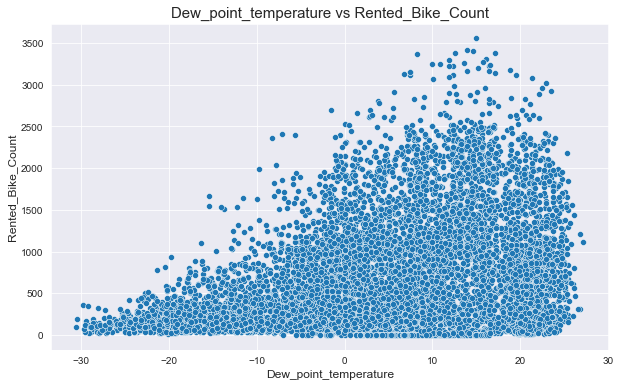

In [33]:
# Chart - 13 visualization code
plt.figure(figsize=(10,6))
sns.scatterplot(x='Dew_point_temperature',y='Rented_Bike_Count',data=df)
plt.title('Dew_point_temperature vs Rented_Bike_Count',fontsize=15)
plt.xlabel('Dew_point_temperature',fontsize=12)
plt.ylabel('Rented_Bike_Count',fontsize=12)

##### 1. Why did you pick the specific chart?

Scatter plots allow us to observe the pattern or trend between two numerical variables. 

##### 2. What is/are the insight(s) found from the chart?

From above chart we can see that there is some linearity between Dew_point_temperature  with dependent variable Rented Bike Count

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses might adjust staffing levels and inventory based on expected changes in dew point temperature to optimize resource allocation.

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

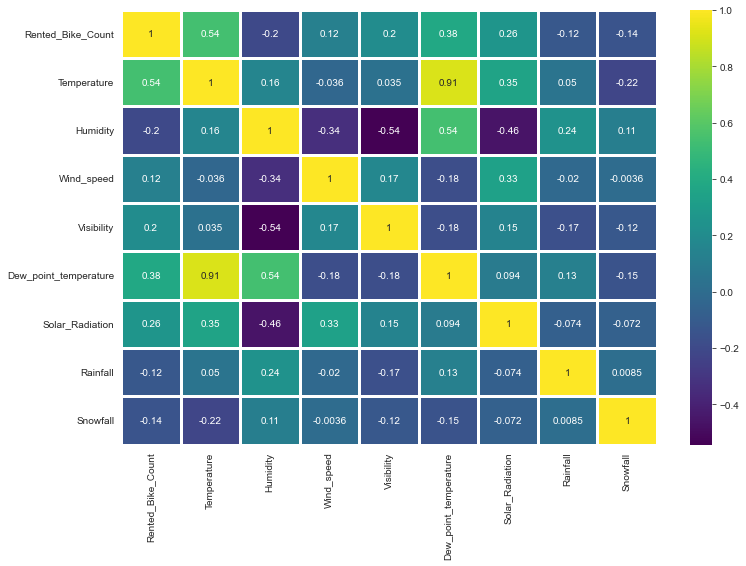

In [34]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=3)

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

There is high multicolinearity between independent variable (i.e temperature & dew point temp)

There is correlation of temperature, hour, dew point temp & solar radiation with dependent variable rented bike.

#### Chart - 15 - Pair Plot 

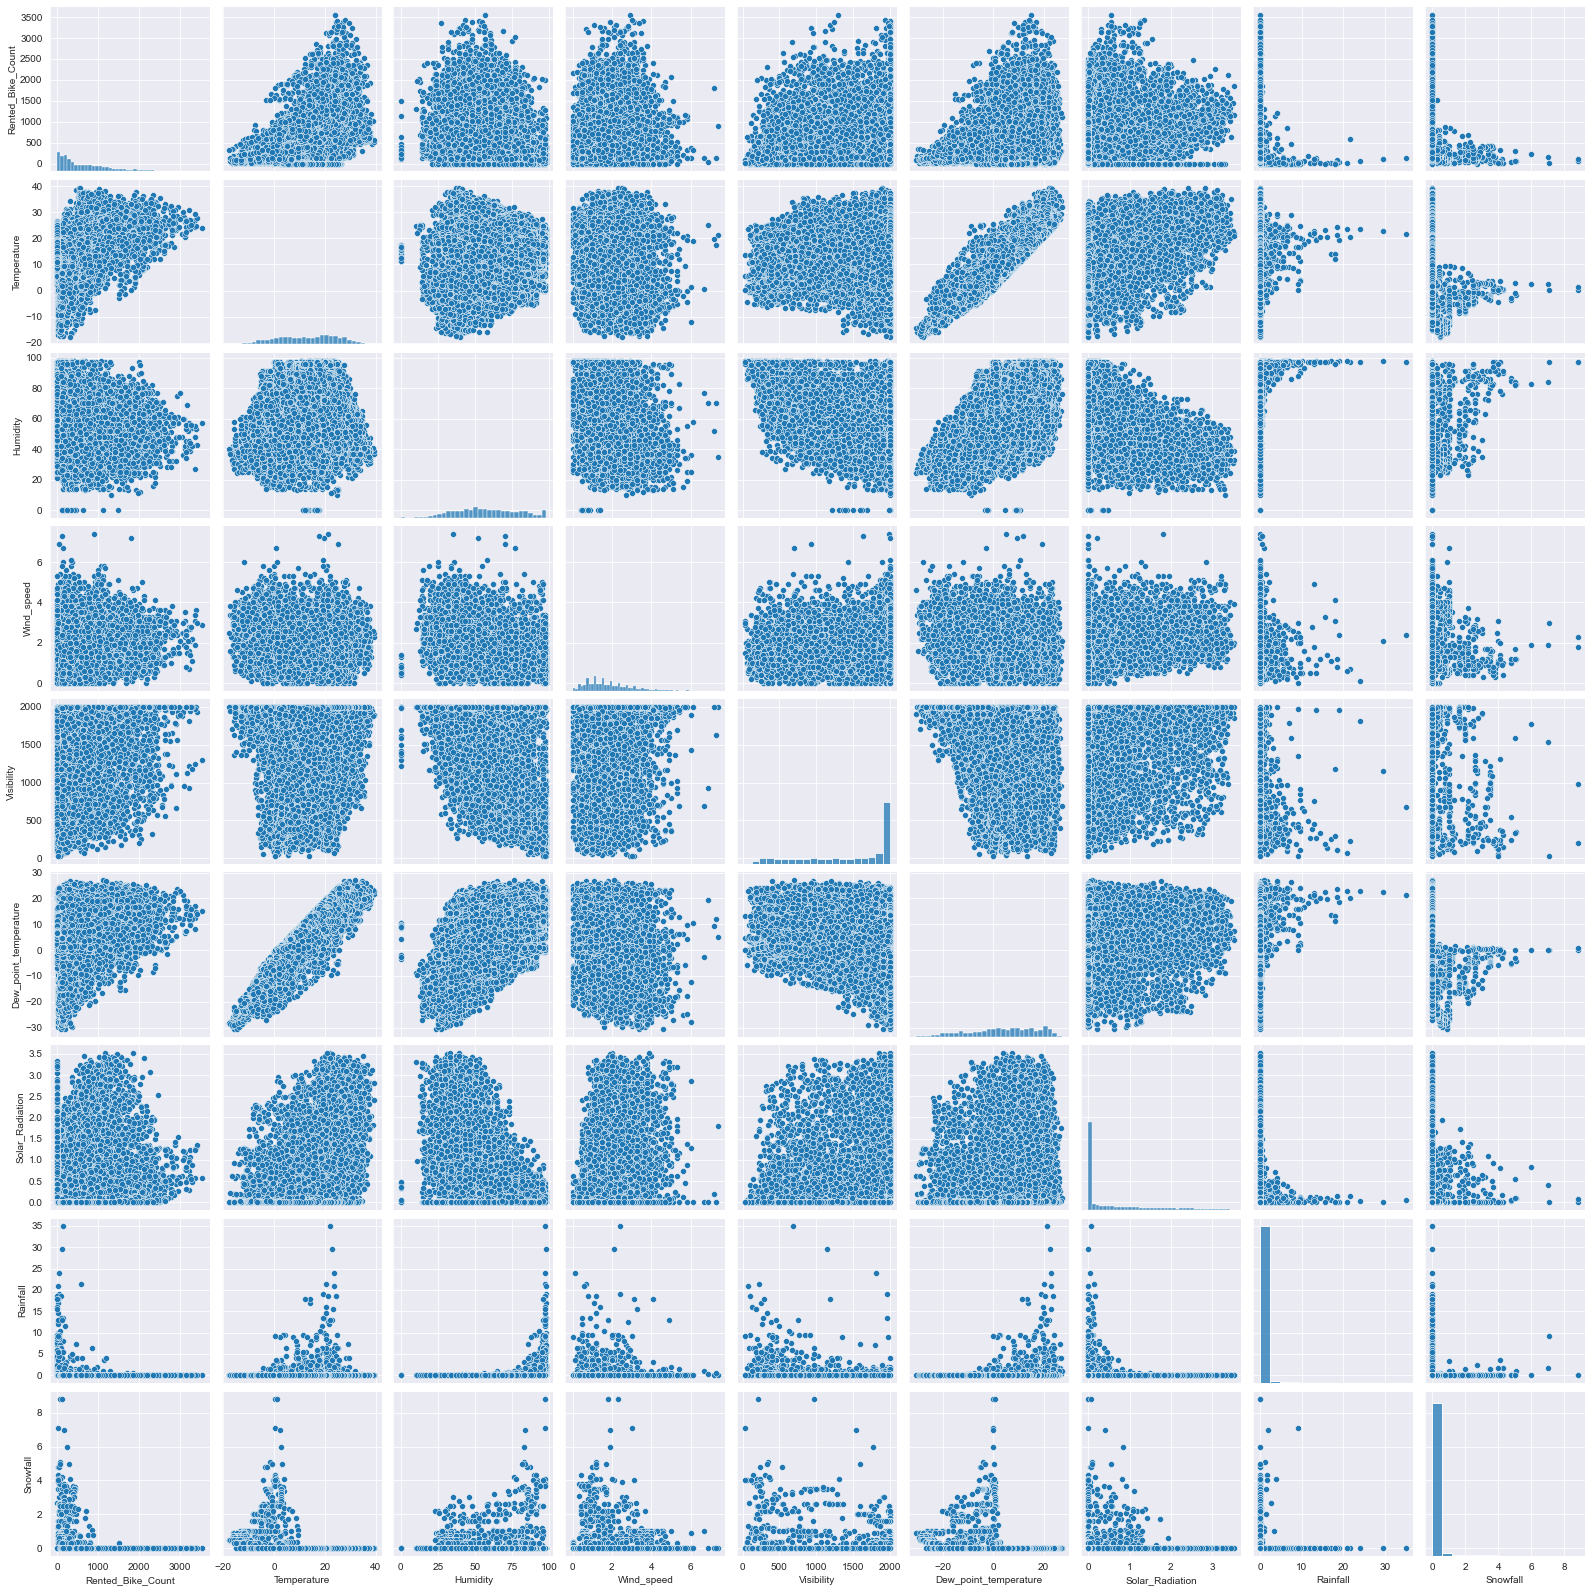

In [35]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From above pair plot we got to know that, there is not clear linear relationship between variables. other than dew point temp, temperature & solar radiation there is no any relationship.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Day                      0
Month                    0
Year                     0
Weekday                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values present

### 2. Handling Outliers

In [37]:
# Handling Outliers & Outlier treatments

In [38]:
df1=df.copy()

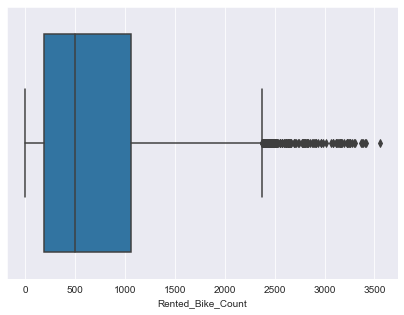

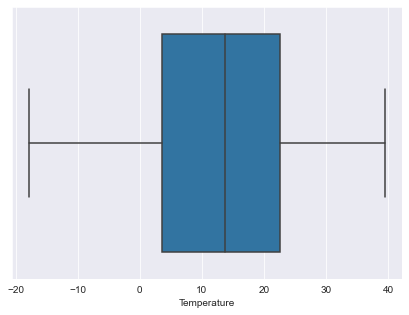

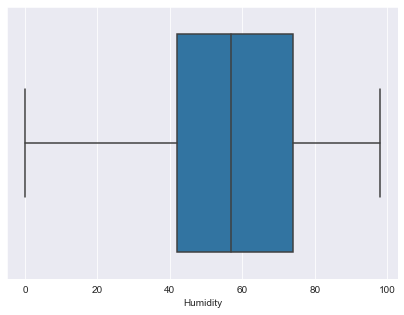

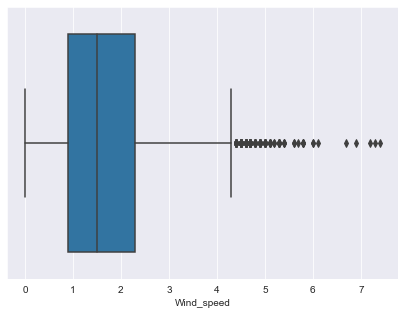

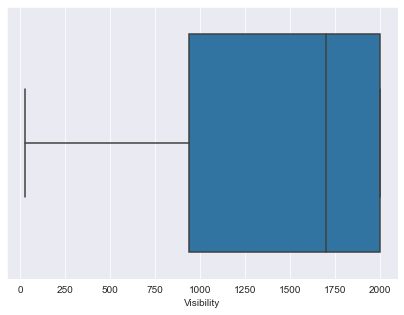

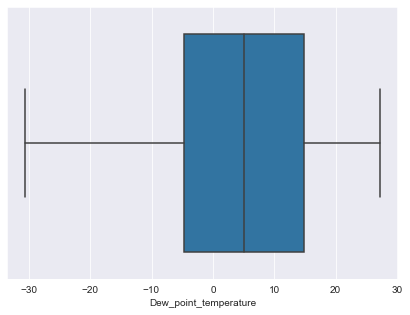

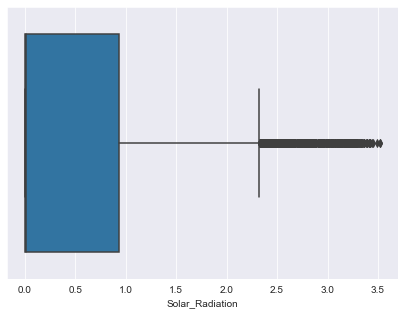

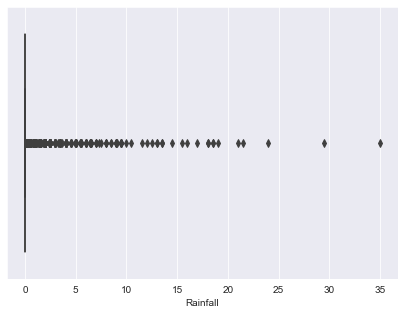

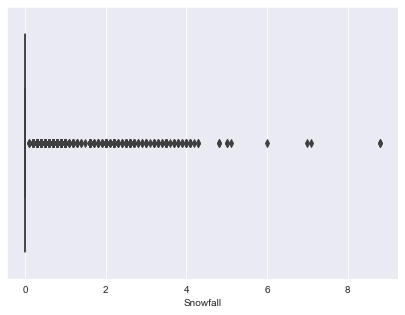

In [39]:
for column_name in numerical_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(df[column_name])
    plt.show()

In [40]:
def iqr_capping(df,columns):
    for col in columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        
        iqr=q3-q1
        
        upper_limit=q3+(1.5*iqr)
        lower_limit=q1-(1.5*iqr)
        
        df[col]=np.where(df[col]>upper_limit,upper_limit,
                np.where(df[col]<lower_limit,lower_limit,df[col]))

In [41]:
iqr_capping(df1,numerical_cols)

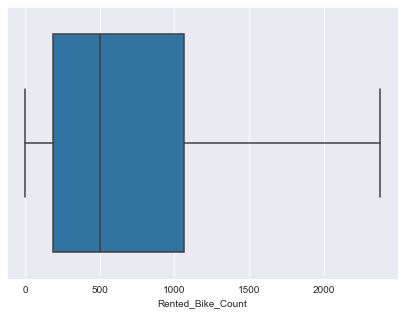

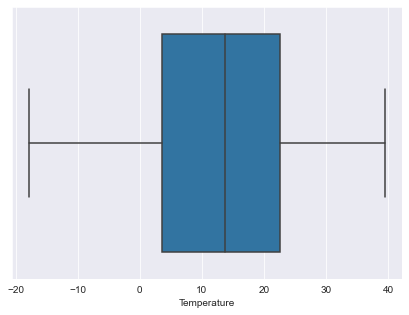

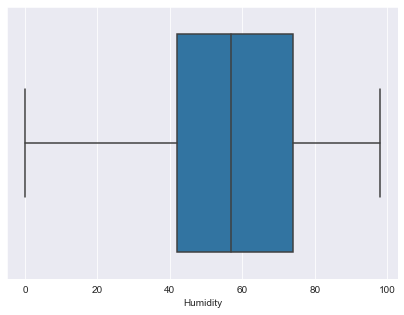

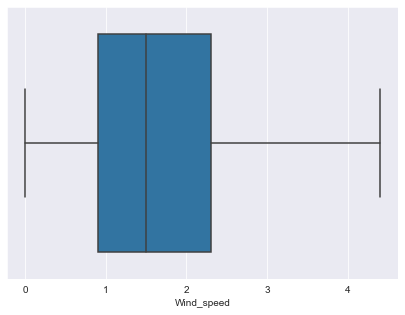

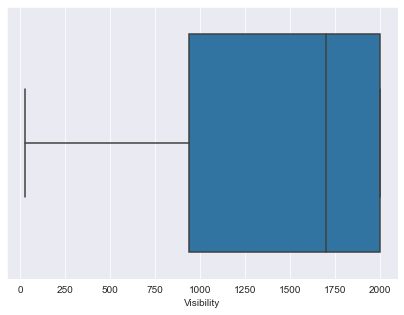

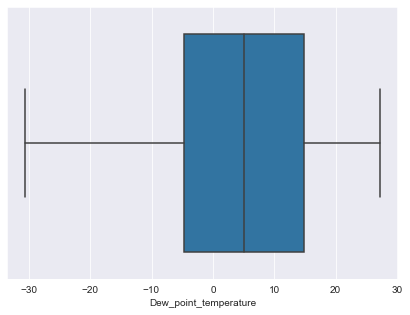

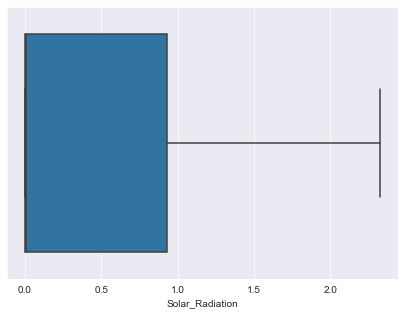

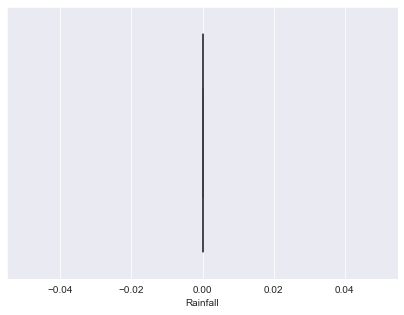

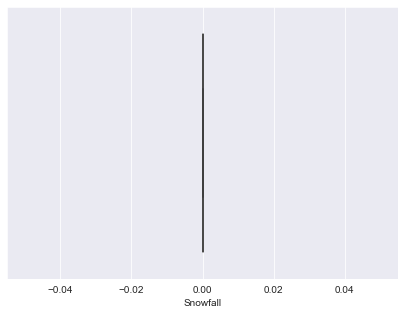

In [42]:
for column_name in numerical_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(df1[column_name])
    plt.show()

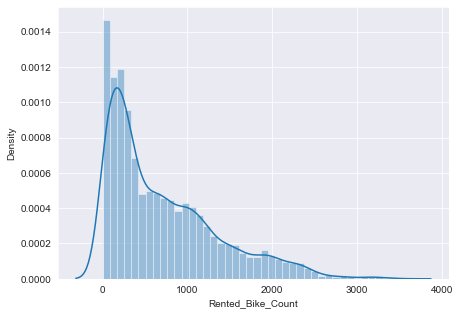

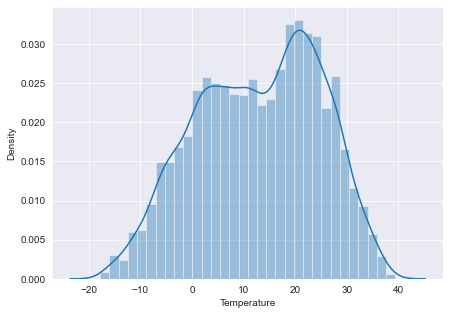

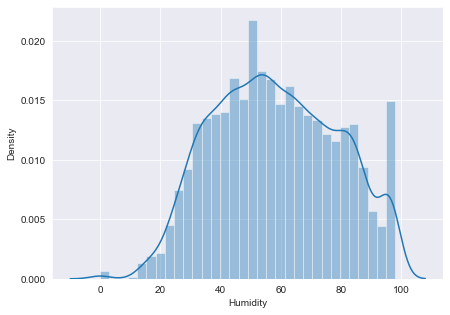

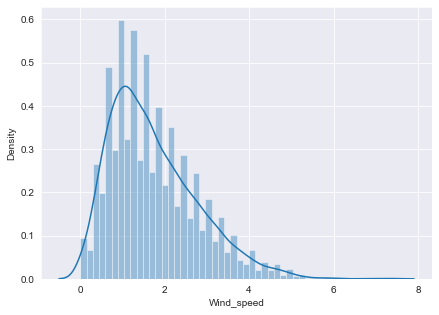

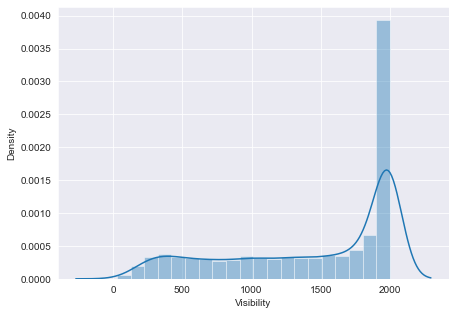

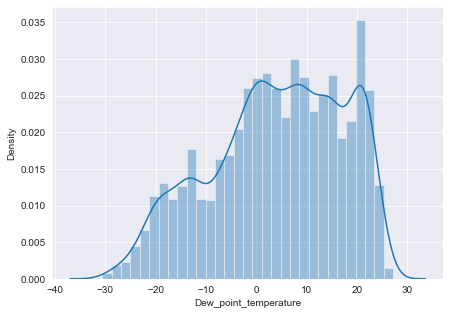

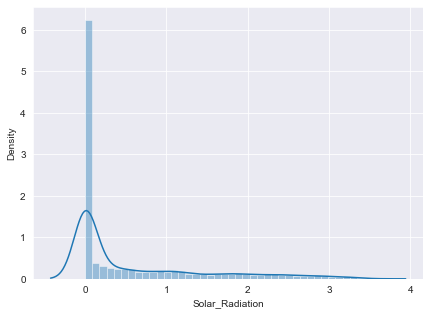

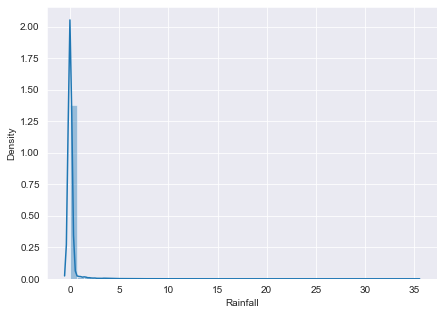

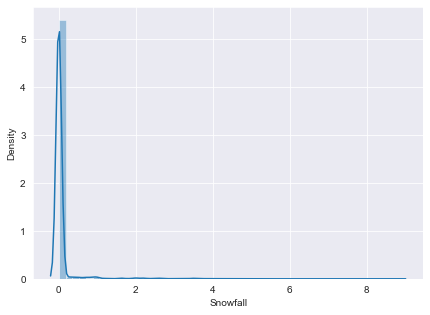

In [43]:
for column_name in numerical_cols:
    plt.figure(figsize=(7,5))
    sns.distplot(df[column_name])
    plt.show()

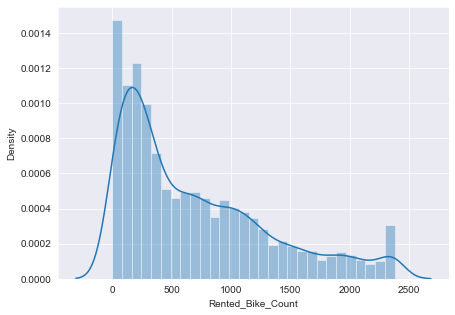

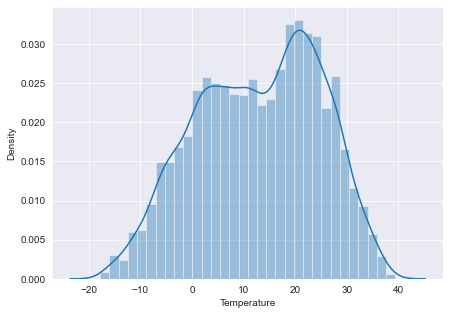

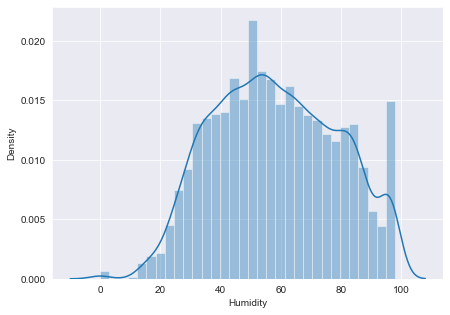

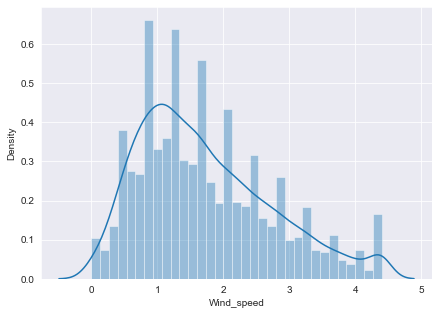

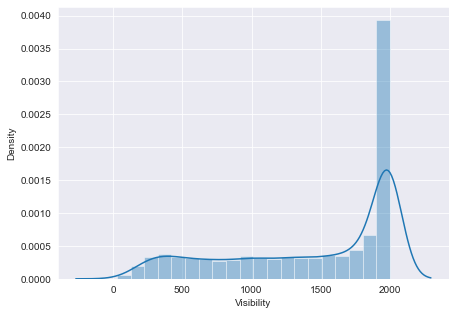

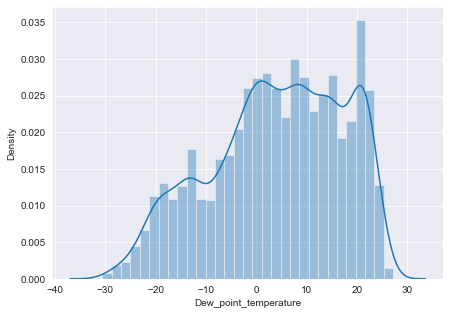

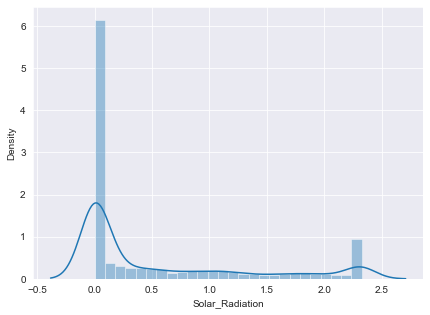

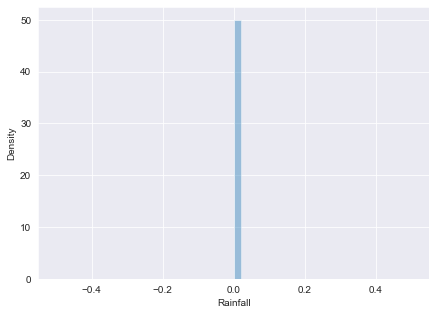

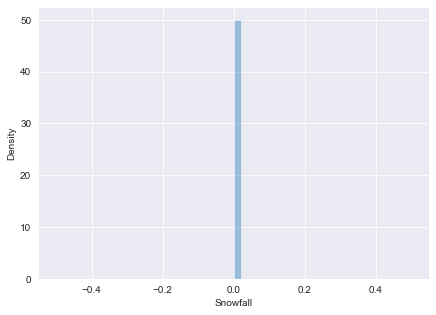

In [44]:
for column_name in numerical_cols:
    plt.figure(figsize=(7,5))
    sns.distplot(df1[column_name])
    plt.show()

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   float64 
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   float64 
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   float64 
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Day                    8760 non-null   category
 14  Month                  8760 non-null   c

##### What all outlier treatment techniques have you used and why did you use those techniques?

The basic idea behind capping is to set a threshold or limit beyond which data points are considered extreme and are replaced with a specified value (either the upper or lower limit). Capping is a form of data transformation that can be effective in reducing the impact of outliers on statistical analysis or modeling.

By capping extreme values, we can reduce the influence of outliers on statistical measures and model performance. This can lead to more stable and reliable results.

### 3. Categorical Encoding

In [46]:
# Encode your categorical columns
df1['Functioning_Day'] = np.where(df1['Functioning_Day'] == 'Yes',1,0)
df1['Holiday'] = np.where(df1['Holiday'] == 'Holiday', 1,0)

In [47]:
# One hot Enoding
df1 = pd.get_dummies(df1, columns = ['Hour','Seasons','Month','Year','Weekday'],drop_first=True)

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   float64 
 1   Temperature            8760 non-null   float64 
 2   Humidity               8760 non-null   float64 
 3   Wind_speed             8760 non-null   float64 
 4   Visibility             8760 non-null   float64 
 5   Dew_point_temperature  8760 non-null   float64 
 6   Solar_Radiation        8760 non-null   float64 
 7   Rainfall               8760 non-null   float64 
 8   Snowfall               8760 non-null   float64 
 9   Holiday                8760 non-null   int32   
 10  Functioning_Day        8760 non-null   int32   
 11  Day                    8760 non-null   category
 12  Hour_1                 8760 non-null   uint8   
 13  Hour_2                 8760 non-null   uint8   
 14  Hour_3                 8760 non-null   u

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding technique

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

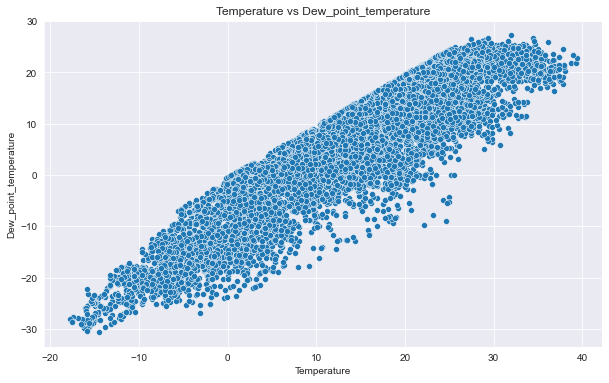

In [49]:
# Manipulate Features to minimize feature correlation and create new features
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature',y='Dew_point_temperature',data=df1)
plt.xlabel('Temperature')
plt.ylabel('Dew_point_temperature')
plt.title('Temperature vs Dew_point_temperature')
plt.show()

In [50]:
# correlation
df1[['Temperature','Dew_point_temperature']].corr()

Temperature  Dew_point_temperature
Temperature               1.000000               0.912798
Dew_point_temperature     0.912798               1.000000

In [51]:
df1.drop('Dew_point_temperature',axis=1,inplace=True)

#### 2. Feature Selection

In [52]:
# Select your features wisely to avoid overfitting
def get_vif(df):
    vif=pd.DataFrame()
    vif['variables']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif

In [53]:
continuous_variables=['Temperature','Humidity','Wind_speed','Visibility','Solar_Radiation','Rainfall','Snowfall']

In [54]:
continuous_feature_df = pd.DataFrame(df1[continuous_variables])

In [55]:
continuous_feature_df

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  \
0            -5.2      37.0         2.2      2000.0              0.0   
1            -5.5      38.0         0.8      2000.0              0.0   
2            -6.0      39.0         1.0      2000.0              0.0   
3            -6.2      40.0         0.9      2000.0              0.0   
4            -6.0      36.0         2.3      2000.0              0.0   
...           ...       ...         ...         ...              ...   
8755          4.2      34.0         2.6      1894.0              0.0   
8756          3.4      37.0         2.3      2000.0              0.0   
8757          2.6      39.0         0.3      1968.0              0.0   
8758          2.1      41.0         1.0      1859.0              0.0   
8759          1.9      43.0         1.3      1909.0              0.0   

      Rainfall  Snowfall  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0  
...        ...       ...  
8755       0.0       0.0  
8756       0.0       0.0  
8757       0.0       0.0  
8758       0.0       0.0  
8759       0.0       0.0  

[8760 rows x 7 columns]

In [56]:
get_vif(df1[[i for i in continuous_feature_df]])

variables       VIF
0      Temperature  2.960633
1         Humidity  4.304860
2       Wind_speed  4.246567
3       Visibility  4.316732
4  Solar_Radiation  2.299369
5         Rainfall       NaN
6         Snowfall       NaN

In [57]:
# Removing Rainfall and Snowfall
get_vif(df1[[i for i in continuous_feature_df if i not in ['Rainfall','Snowfall']]])

variables       VIF
0      Temperature  2.960633
1         Humidity  4.304860
2       Wind_speed  4.246567
3       Visibility  4.316732
4  Solar_Radiation  2.299369

In [58]:
df1.drop(['Rainfall','Snowfall','Day'],axis=1,inplace=True)

In [59]:
features = [i for i in df1.columns if i not in ['Rented_Bike_Count','Dew_point_temperature','Rainfall','Snowfall','Day']]

Droping 'Rainfall' and 'Snowfall' column from the data because there is NaN values in the columns after removing the outliers, so these column is not much important for our data so we can drop it.

##### What all feature selection methods have you used  and why?

We have used pearson correlation coefficient to check correlation between variables and also with dependent variable

And also we check the multicolinearity using VIF and remove those who are having high VIF value.

##### Which all features you found important and why?

As there is high correlation between temperature and dew point temperature. We have removed dew point temperature

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Text(0, 0.5, 'Density')

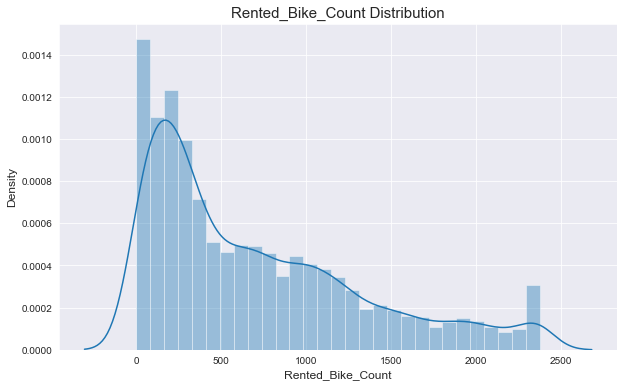

In [60]:
# Transform Your data
# visualizing the distribution of the dependent variable
plt.figure(figsize=(10,6))
sns.distplot(df1['Rented_Bike_Count'])
plt.title('Rented_Bike_Count Distribution',fontsize=15)
plt.xlabel('Rented_Bike_Count',fontsize=12)
plt.ylabel('Density',fontsize=12)

Text(0, 0.5, 'Density')

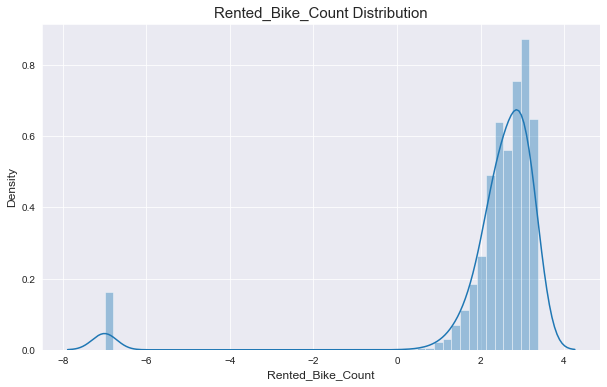

In [61]:
# visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(10,6))
sns.distplot(np.log10(df1['Rented_Bike_Count']+0.0000001))
plt.title('Rented_Bike_Count Distribution',fontsize=15)
plt.xlabel('Rented_Bike_Count',fontsize=12)
plt.ylabel('Density',fontsize=12)

Text(0, 0.5, 'Density')

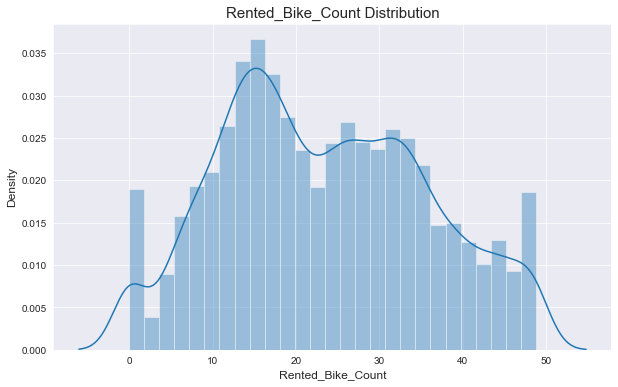

In [62]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(df1['Rented_Bike_Count']))
plt.title('Rented_Bike_Count Distribution',fontsize=15)
plt.xlabel('Rented_Bike_Count',fontsize=12)
plt.ylabel('Density',fontsize=12)

In [63]:
# Defining dependent and independent variables
X = df1.drop('Rented_Bike_Count',axis=1)
y = np.sqrt(df1['Rented_Bike_Count'])

So, first I have calculate the skewness value and I have found that rented bike attribute is positively skewed so I used log transfomation but it affected negatively

So, I finally used square root transformation & now data looks normally distrubuted & skewness is also reduced.

### 4. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (7008, 51)
Shape of y_train (7008,)
Shape of X_test (1752, 51)
Shape of y_test (1752,)


##### What data splitting ratio have you used and why? 

I have used spliting ratio of 80-20 i.e 80% for training and 20% for testing

### 5. Data Scaling

In [66]:
# Scaling your data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### Which method have you used to scale you data and why?

I have used Standardization for Data Scaling

Standardization is a preprocessing technique to scale numerical features to have a mean of 0 and a standard deviation of 1

## ***6. ML Model Implementation***

### ML Model - Linear Regression

In [67]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

y_pred_train_lr=lr_model.predict(X_train)
y_pred_test_lr=lr_model.predict(X_test)

#Training set
mae_train_lr=mean_absolute_error(y_train,y_pred_train_lr)
mse_train_lr=mean_squared_error(y_train,y_pred_train_lr)
rmse_train_lr=np.sqrt(mean_squared_error(y_train,y_pred_train_lr))
r2_score_train_lr=r2_score(y_train,y_pred_train_lr)
adj_r2_score_train_lr=1-(1-r2_score_train_lr)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))


#Test set
mae_test_lr=mean_absolute_error(y_test,y_pred_test_lr)
mse_test_lr=mean_squared_error(y_test,y_pred_test_lr)
rmse_test_lr=np.sqrt(mean_squared_error(y_test,y_pred_test_lr))
r2_score_test_lr=r2_score(y_test,y_pred_test_lr)
adj_r2_score_test_lr=1-(1-r2_score_test_lr)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

### Metrics on Train data

In [68]:
print('MAE: ',mae_train_lr)
print('MSE: ',mse_train_lr)
print('RMSE: ',rmse_train_lr)
print('R2_Score: ',r2_score_train_lr)
print('Adjusted R2: ',adj_r2_score_train_lr)

MAE:  4.7375904428548345
MSE:  38.50455112536088
RMSE:  6.20520355229068
R2_Score:  0.746864725247189
Adjusted R2:  0.7392706670046048


### Metrics on Test data

In [69]:
print('MAE: ',mae_test_lr)
print('MSE: ',mse_test_lr)
print('RMSE: ',rmse_test_lr)
print('R2_Score: ',r2_score_test_lr)
print('Adjusted R2: ',adj_r2_score_test_lr)

MAE:  4.811928022349933
MSE:  39.79004939577594
RMSE:  6.30793543053319
R2_Score:  0.736010897430946
Adjusted R2:  0.7280912243538744


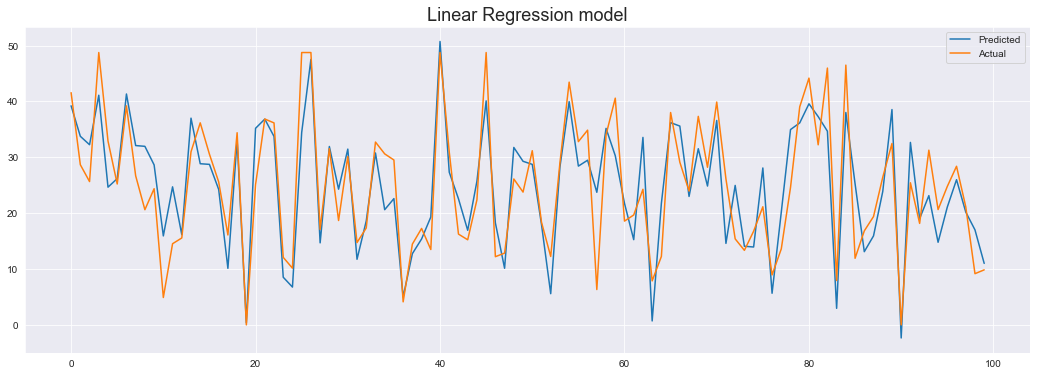

In [70]:
plt.figure(figsize=(18,6))
plt.plot((y_pred_test_lr)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Linear Regression model', fontsize=18)
plt.show()

### ML Model - Ridge Regression

In [71]:
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)

y_pred_train_ridge=ridge_model.predict(X_train)
y_pred_test_ridge=ridge_model.predict(X_test)

#Training set
mae_train_ridge=mean_absolute_error(y_train,y_pred_train_ridge)
mse_train_ridge=mean_squared_error(y_train,y_pred_train_ridge)
rmse_train_ridge=np.sqrt(mean_squared_error(y_train,y_pred_train_ridge))
r2_score_train_ridge=r2_score(y_train,y_pred_train_ridge)
adj_r2_score_train_ridge=1-(1-r2_score_train_ridge)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))


#Test set
mae_test_ridge=mean_absolute_error(y_test,y_pred_test_ridge)
mse_test_ridge=mean_squared_error(y_test,y_pred_test_ridge)
rmse_test_ridge=np.sqrt(mean_squared_error(y_test,y_pred_test_ridge))
r2_score_test_ridge=r2_score(y_test,y_pred_test_ridge)
adj_r2_score_test_ridge=1-(1-r2_score_test_ridge)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

### Metrics on Train data

In [72]:
print('MAE: ',mae_train_ridge)
print('MSE: ',mse_train_ridge)
print('RMSE: ',rmse_train_ridge)
print('R2_Score: ',r2_score_train_ridge)
print('Adjusted R2: ',adj_r2_score_train_ridge)

MAE:  4.737607608784131
MSE:  38.504557012176406
RMSE:  6.20520402663574
R2_Score:  0.7468646865462921
Adjusted R2:  0.7392706271426809


### Metrics on Test data

In [73]:
print('MAE: ',mae_test_ridge)
print('MSE: ',mse_test_ridge)
print('RMSE: ',rmse_test_ridge)
print('R2_Score: ',r2_score_test_ridge)
print('Adjusted R2: ',adj_r2_score_test_ridge)

MAE:  4.811880925855248
MSE:  39.79031903975156
RMSE:  6.307956803890746
R2_Score:  0.7360091084643019
Adjusted R2:  0.728089381718231


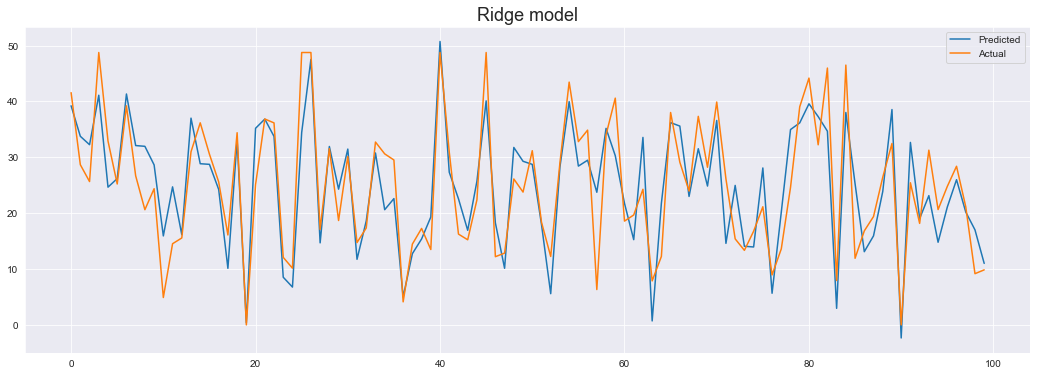

In [74]:
plt.figure(figsize=(18,6))
plt.plot((y_pred_test_ridge)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Ridge model', fontsize=18)
plt.show()

####  Cross- Validation & Hyperparameter Tuning

In [75]:
ridge_model_tuning=Ridge()

parameters = {'alpha': [1,0.01,0.001,5,10,18,19,20,25,80,400]}

grid_ridge=GridSearchCV(estimator=ridge_model_tuning,param_grid=parameters,scoring='r2', cv=5)
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.01, 0.001, 5, 10, 18, 19, 20, 25, 80,
                                   400]},
             scoring='r2')

In [76]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_ridge.best_params_)
print("Best R2 score: ", grid_ridge.best_score_)

Best parameters:  {'alpha': 18}
Best R2 score:  0.7418971516715386


In [77]:
# Initiate ridge with best alpha
best_ridge = Ridge(alpha = grid_ridge.best_params_['alpha'])

#prediction for Ridge regression
best_ridge.fit(X_train, y_train)

# Predict on model
y_pred_test_ridge_grid = best_ridge.predict(X_test)

In [78]:
mae_test_ridge_grid=mean_absolute_error(y_test,y_pred_test_ridge_grid)
mse_test_ridge_grid=mean_squared_error(y_test,y_pred_test_ridge_grid)
rmse_test_ridge_grid=np.sqrt(mean_squared_error(y_test,y_pred_test_ridge_grid))
r2_score_test_ridge_grid=r2_score(y_test,y_pred_test_ridge_grid)
adj_r2_score_test_ridge_grid=1-(1-r2_score_test_ridge_grid)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

In [79]:
print('MAE: ',mae_test_ridge_grid)
print('MSE: ',mse_test_ridge_grid)
print('RMSE: ',rmse_test_ridge_grid)
print('R2_Score: ',r2_score_test_ridge_grid)
print('Adjusted R2: ',adj_r2_score_test_ridge_grid)

MAE:  4.811184043146852
MSE:  39.796382232352556
RMSE:  6.308437384356965
R2_Score:  0.7359688819052062
Adjusted R2:  0.7280479483623623


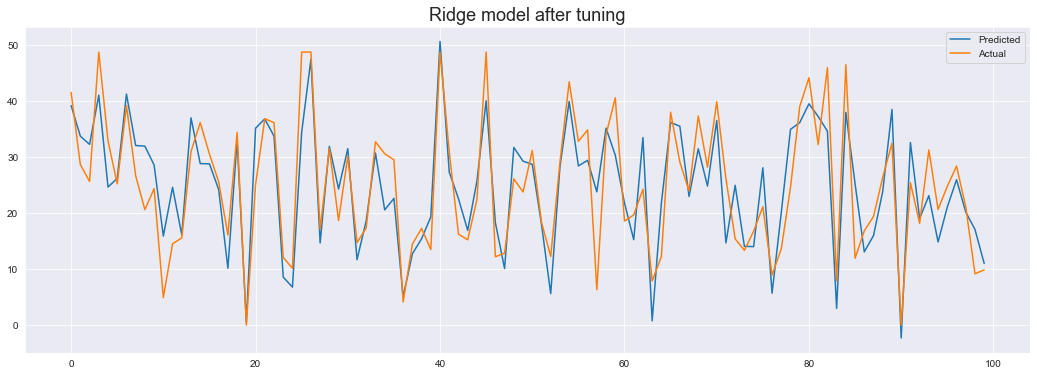

In [80]:
plt.figure(figsize=(18,6))
plt.plot((y_pred_test_ridge_grid)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Ridge model after tuning', fontsize=18)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have tuned Ridge regression using hyperparametric technique & check the performance of the model and we have found that there is no significant difference in between tuned and without tuned.

### ML Model - Lasso

In [81]:
lasso_model=Lasso()
lasso_model.fit(X_train,y_train)

y_pred_train_lasso=lasso_model.predict(X_train)
y_pred_test_lasso=lasso_model.predict(X_test)


#Training set
mae_train_lasso=mean_absolute_error(y_train,y_pred_train_lasso)
mse_train_lasso=mean_squared_error(y_train,y_pred_train_lasso)
rmse_train_lasso=np.sqrt(mean_squared_error(y_train,y_pred_train_lasso))
r2_score_train_lasso=r2_score(y_train,y_pred_train_lasso)
adj_r2_score_train_lasso=1-(1-r2_score_train_lasso)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))


#Test set
mae_test_lasso=mean_absolute_error(y_test,y_pred_test_lasso)
mse_test_lasso=mean_squared_error(y_test,y_pred_test_lasso)
rmse_test_lasso=np.sqrt(mean_squared_error(y_test,y_pred_test_lasso))
r2_score_test_lasso=r2_score(y_test,y_pred_test_lasso)
adj_r2_score_test_lasso=1-(1-r2_score_test_lasso)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

### Metrics on Train data

In [82]:
print('MAE: ',mae_train_lasso)
print('MSE: ',mse_train_lasso)
print('RMSE: ',rmse_train_lasso)
print('R2_Score: ',r2_score_train_lasso)
print('Adjusted R2: ',adj_r2_score_train_lasso)

MAE:  5.959090273685536
MSE:  58.62273583784258
RMSE:  7.656548559099106
R2_Score:  0.6146044581909236
Adjusted R2:  0.6030425919366513


### Metrics on Test data

In [83]:
print('MAE: ',mae_test_lasso)
print('MSE: ',mse_test_lasso)
print('RMSE: ',rmse_test_lasso)
print('R2_Score: ',r2_score_test_lasso)
print('Adjusted R2: ',adj_r2_score_test_lasso)

MAE:  5.8597556356143965
MSE:  57.57211736508633
RMSE:  7.58762923218355
R2_Score:  0.618034864821685
Adjusted R2:  0.6065759107663355


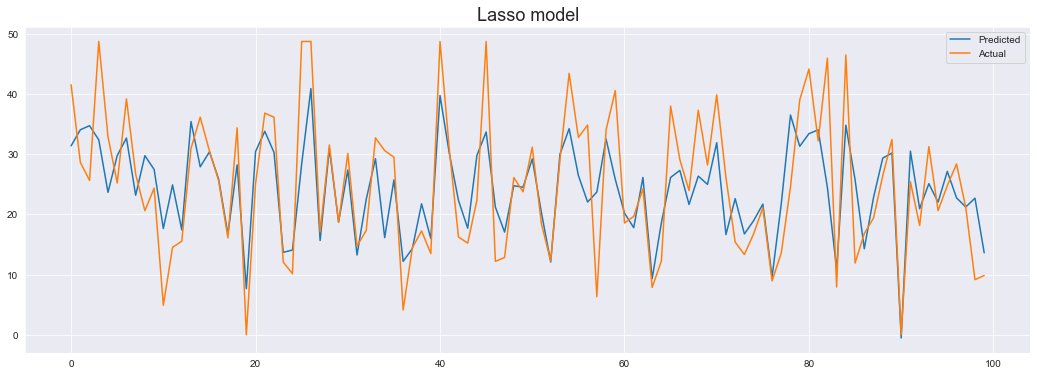

In [84]:
plt.figure(figsize=(18,6))
plt.plot((y_pred_test_lasso)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Lasso model', fontsize=18)
plt.show()

####  Cross- Validation & Hyperparameter Tuning

In [85]:
lasso_model_tuning=Lasso()

parameters = {'alpha': [1,0.01,0.001,5,10,18,19,20,25,80,400]}

grid_lasso=GridSearchCV(estimator=lasso_model_tuning,param_grid=parameters,scoring='r2', cv=5)
grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 0.01, 0.001, 5, 10, 18, 19, 20, 25, 80,
                                   400]},
             scoring='r2')

In [86]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_lasso.best_params_)
print("Best R2 score: ", grid_lasso.best_score_)

Best parameters:  {'alpha': 0.01}
Best R2 score:  0.7419149481527091


In [87]:
# Initiate ridge with best alpha
best_lasso = Lasso(alpha = grid_lasso.best_params_['alpha'])

#prediction for Ridge regression
best_lasso.fit(X_train, y_train)

# Predict on model
y_pred_test_lasso_grid = best_lasso.predict(X_test)

In [88]:
mae_test_lasso_grid=mean_absolute_error(y_test,y_pred_test_lasso_grid)
mse_test_lasso_grid=mean_squared_error(y_test,y_pred_test_lasso_grid)
rmse_test_lasso_grid=np.sqrt(mean_squared_error(y_test,y_pred_test_lasso_grid))
r2_score_test_lasso_grid=r2_score(y_test,y_pred_test_lasso_grid)
adj_r2_score_test_lasso_grid=1-(1-r2_score_test_lasso_grid)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

In [89]:
print('MAE: ',mae_test_lasso_grid)
print('MSE: ',mse_test_lasso_grid)
print('RMSE: ',rmse_test_lasso_grid)
print('R2_Score: ',r2_score_test_lasso_grid)
print('Adjusted R2: ',adj_r2_score_test_lasso_grid)

MAE:  4.803955287055824
MSE:  39.74732347681524
RMSE:  6.304547840790427
R2_Score:  0.7362943647091764
Adjusted R2:  0.7283831956504517


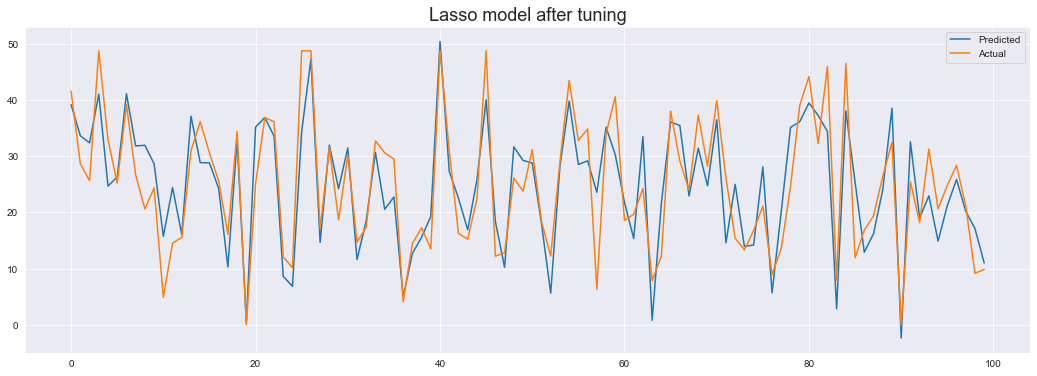

In [90]:
plt.figure(figsize=(18,6))
plt.plot((y_pred_test_lasso_grid)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Lasso model after tuning', fontsize=18)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning we have seen that there is increse in performance from 60% to 72%

### ML Model - Decision Tree

In [91]:
dtr_model=DecisionTreeRegressor(criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=100)
dtr_model.fit(X_train,y_train)

y_pred_train_dtr=dtr_model.predict(X_train)
y_pred_test_dtr=dtr_model.predict(X_test)


#Training set
mae_train_dtr=mean_absolute_error(y_train,y_pred_train_dtr)
mse_train_dtr=mean_squared_error(y_train,y_pred_train_dtr)
rmse_train_dtr=np.sqrt(mean_squared_error(y_train,y_pred_train_dtr))
r2_score_train_dtr=r2_score(y_train,y_pred_train_dtr)
adj_r2_score_train_dtr=1-(1-r2_score_train_dtr)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))


#Test set
mae_test_dtr=mean_absolute_error(y_test,y_pred_test_dtr)
mse_test_dtr=mean_squared_error(y_test,y_pred_test_dtr)
rmse_test_dtr=np.sqrt(mean_squared_error(y_test,y_pred_test_dtr))
r2_score_test_dtr=r2_score(y_test,y_pred_test_dtr)
adj_r2_score_test_dtr=1-(1-r2_score_test_dtr)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))



### Metrics on Train data

In [92]:
print('MAE: ',mae_train_dtr)
print('MSE: ',mse_train_dtr)
print('RMSE: ',rmse_train_dtr)
print('R2_Score: ',r2_score_train_dtr)
print('Adjusted R2: ',adj_r2_score_train_dtr)

MAE:  3.2743153213466196
MSE:  20.61167428233204
RMSE:  4.540008180866202
R2_Score:  0.864495451054952
Adjusted R2:  0.8604303145866006


### Metrics on Test data

In [93]:
print('MAE: ',mae_test_dtr)
print('MSE: ',mse_test_dtr)
print('RMSE: ',rmse_test_dtr)
print('R2_Score: ',r2_score_test_dtr)
print('Adjusted R2: ',adj_r2_score_test_dtr)

MAE:  3.6434529921808565
MSE:  27.5859029508026
RMSE:  5.252228379535928
R2_Score:  0.8169799265362943
Adjusted R2:  0.8114893243323831


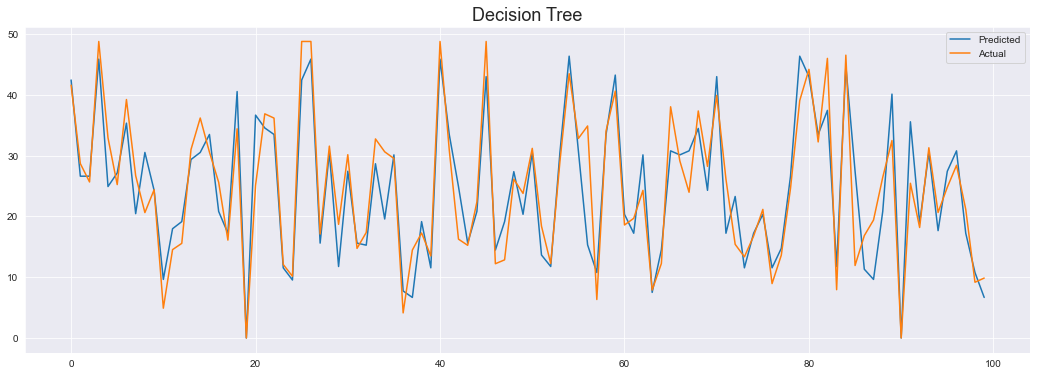

In [94]:
plt.figure(figsize=(18,6))
plt.plot((y_pred_test_dtr)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Decision Tree', fontsize=18)
plt.show()

In [95]:
features = features
importances = dtr_model.feature_importances_
indices = np.argsort(importances)

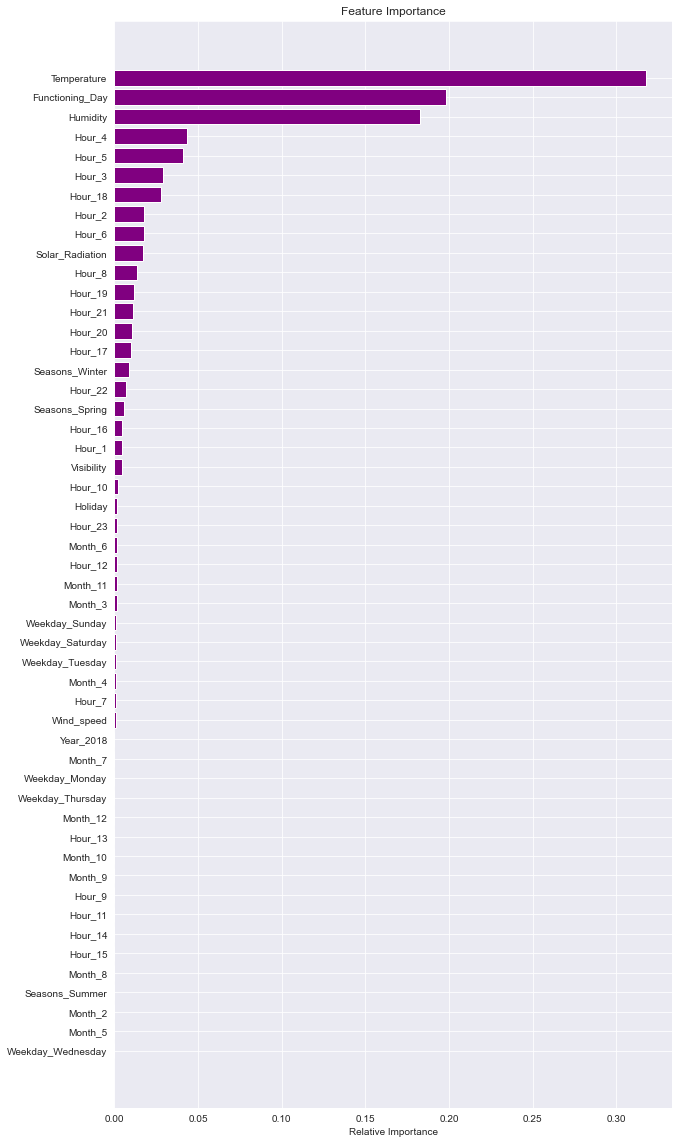

In [96]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

####  Cross- Validation & Hyperparameter Tuning

In [97]:
dtr_model_tuning=DecisionTreeRegressor(random_state=5)

param_grid = {'max_depth' : [24,26,28],
        'min_samples_split' : np.arange(42,50),
        'min_samples_leaf' : np.arange(3,10,2)}

grid_dtr=GridSearchCV(estimator=dtr_model_tuning,param_grid=param_grid,scoring='r2', cv=5)
grid_dtr.fit(X_train,y_train)
dt_best_params = grid_dtr.best_params_

In [98]:
dt_best_params

{'max_depth': 26, 'min_samples_leaf': 5, 'min_samples_split': 47}

In [99]:
best_dtr=DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                              min_samples_leaf=dt_best_params['min_samples_leaf'],
                              min_samples_split=dt_best_params['min_samples_split'],
                              random_state=5)

In [100]:
#prediction for Ridge regression
best_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=26, min_samples_leaf=5, min_samples_split=47,
                      random_state=5)

In [101]:
# Predict on model
y_pred_test_dtr_grid = best_dtr.predict(X_test)

In [102]:
mae_test_dtr_grid=mean_absolute_error(y_test,y_pred_test_dtr_grid)
mse_test_dtr_grid=mean_squared_error(y_test,y_pred_test_dtr_grid)
rmse_test_dtr_grid=np.sqrt(mean_squared_error(y_test,y_pred_test_dtr_grid))
r2_score_test_dtr_grid=r2_score(y_test,y_pred_test_dtr_grid)
adj_r2_score_test_dtr_grid=1-(1-r2_score_test_dtr_grid)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

In [103]:
print('MAE: ',mae_test_dtr_grid)
print('MSE: ',mse_test_dtr_grid)
print('RMSE: ',rmse_test_dtr_grid)
print('R2_Score: ',r2_score_test_dtr_grid)
print('Adjusted R2: ',adj_r2_score_test_dtr_grid)

MAE:  3.26009754548614
MSE:  23.201480694591265
RMSE:  4.816791535305557
R2_Score:  0.8460685985605085
Adjusted R2:  0.8414506565173238


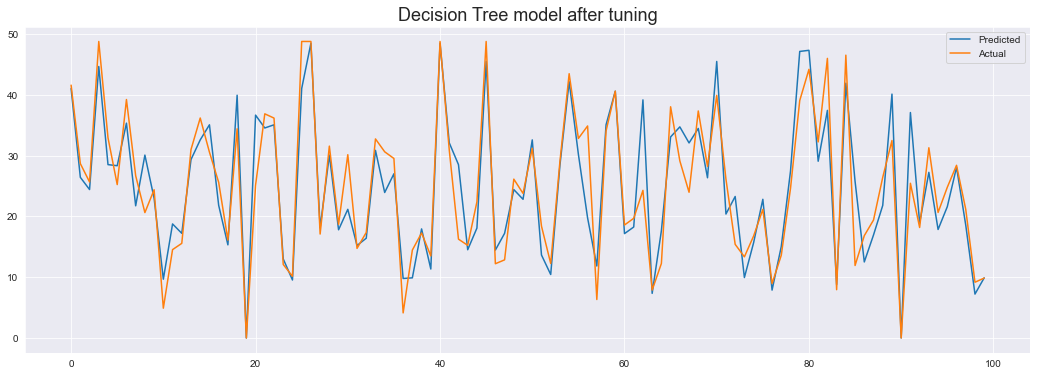

In [104]:
plt.figure(figsize=(18,6))
plt.plot((y_pred_test_dtr_grid)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Decision Tree model after tuning', fontsize=18)
plt.show()

In [105]:
features = features
importances = best_dtr.feature_importances_
indices = np.argsort(importances)

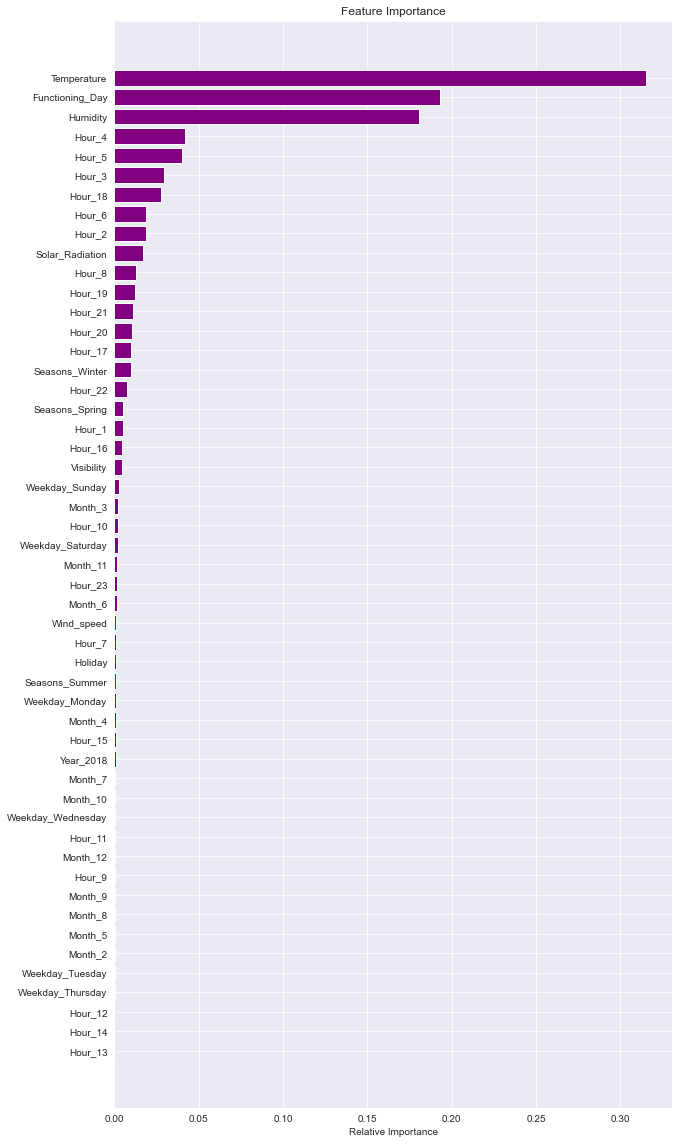

In [106]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After conducting hyperparameter tuning, we observed a noticeable improvement in model performance. The model's accuracy increased from 81% to 84%.

### ML Model - Random Forest

In [107]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

y_pred_train_rf=rf_model.predict(X_train)
y_pred_test_rf=rf_model.predict(X_test)


#Training set
mae_train_rf=mean_absolute_error(y_train,y_pred_train_rf)
mse_train_rf=mean_squared_error(y_train,y_pred_train_rf)
rmse_train_rf=np.sqrt(mean_squared_error(y_train,y_pred_train_rf))
r2_score_train_rf=r2_score(y_train,y_pred_train_rf)
adj_r2_score_train_rf=1-(1-r2_score_train_rf)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))


#Test set
mae_test_rf=mean_absolute_error(y_test,y_pred_test_rf)
mse_test_rf=mean_squared_error(y_test,y_pred_test_rf)
rmse_test_rf=np.sqrt(mean_squared_error(y_test,y_pred_test_rf))
r2_score_test_rf=r2_score(y_test,y_pred_test_rf)
adj_r2_score_test_rf=1-(1-r2_score_test_rf)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))



### Metrics on Train data

In [108]:
print('MAE: ',mae_train_rf)
print('MSE: ',mse_train_rf)
print('RMSE: ',rmse_train_rf)
print('R2_Score: ',r2_score_train_rf)
print('Adjusted R2: ',adj_r2_score_train_rf)

MAE:  0.9937179479533009
MSE:  2.3610348318589423
RMSE:  1.5365659217420327
R2_Score:  0.9844781672972179
Adjusted R2:  0.9840125123161345


### Metrics on Test data

In [109]:
print('MAE: ',mae_test_rf)
print('MSE: ',mse_test_rf)
print('RMSE: ',rmse_test_rf)
print('R2_Score: ',r2_score_test_rf)
print('Adjusted R2: ',adj_r2_score_test_rf)

MAE:  2.669383242198087
MSE:  16.611286718699958
RMSE:  4.075694630207219
R2_Score:  0.889791575030003
Adjusted R2:  0.886485322280903


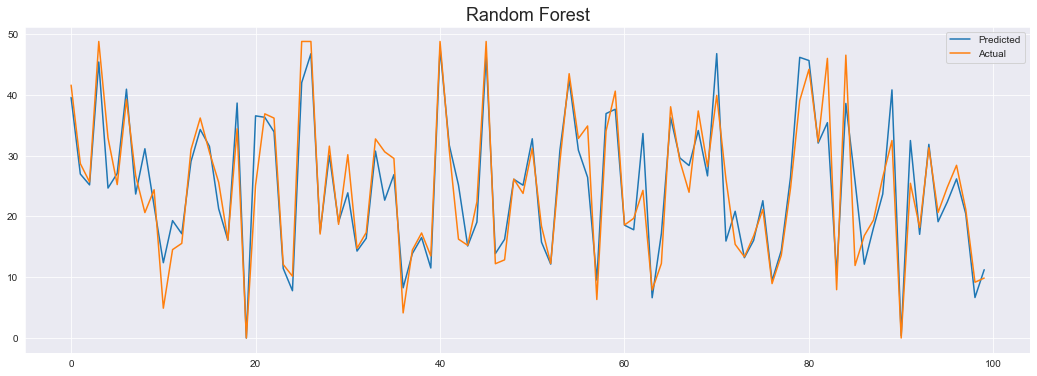

In [110]:
plt.figure(figsize=(18,6))
plt.plot((y_pred_test_rf)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Random Forest', fontsize=18)
plt.show()

In [111]:
features = features
importances = rf_model.feature_importances_
indices = np.argsort(importances)

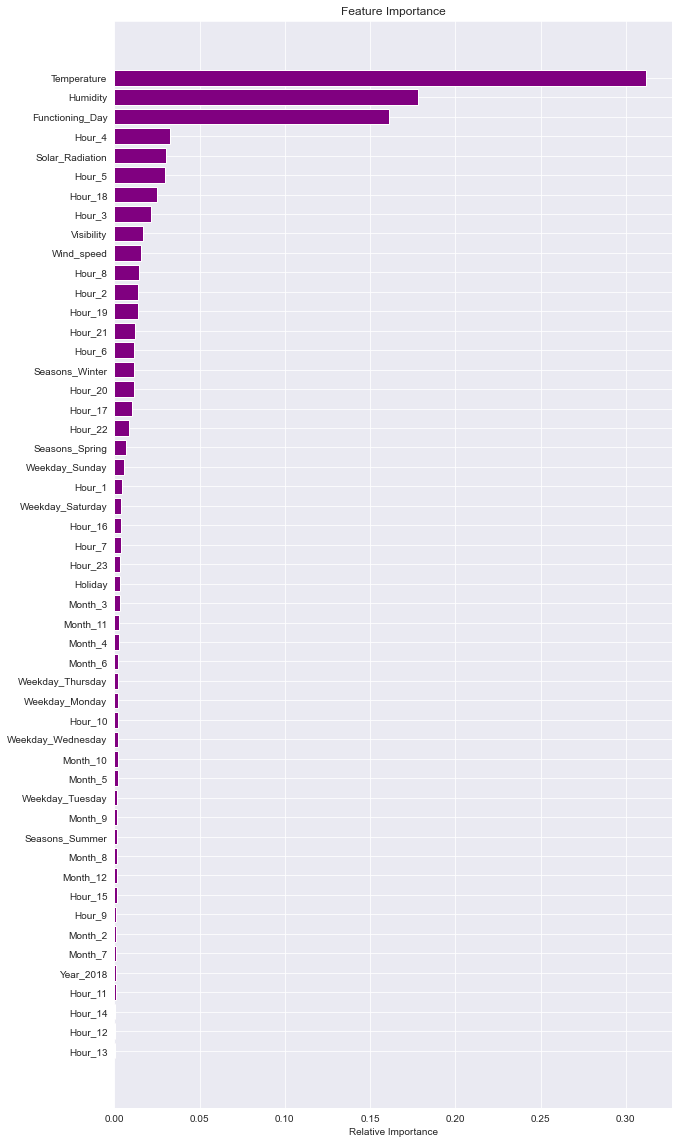

In [112]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

####  Cross- Validation & Hyperparameter Tuning

In [113]:
rf_model_tuning=RandomForestRegressor()

param_grid = {'n_estimators': [200],      
    'max_depth': [None],      
    'min_samples_split': [5],     
    'min_samples_leaf': [2]}         
grid_rf=GridSearchCV(estimator=rf_model_tuning,param_grid=param_grid,scoring='r2', cv=5)
grid_rf.fit(X_train,y_train)
rf_best_params = grid_rf.best_params_

In [114]:
rf_best_params

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [115]:
best_rf=RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                              max_depth=rf_best_params['max_depth'],
                              min_samples_leaf=rf_best_params['min_samples_leaf'],
                              min_samples_split=rf_best_params['min_samples_split'])

In [116]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=200)

In [117]:
# Predict on model
y_pred_test_rf_grid = best_rf.predict(X_test)

In [118]:
mae_test_rf_grid=mean_absolute_error(y_test,y_pred_test_rf_grid)
mse_test_rf_grid=mean_squared_error(y_test,y_pred_test_rf_grid)
rmse_test_rf_grid=np.sqrt(mean_squared_error(y_test,y_pred_test_rf_grid))
r2_score_test_rf_grid=r2_score(y_test,y_pred_test_rf_grid)
adj_r2_score_test_rf_grid=1-(1-r2_score_test_rf_grid)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

In [119]:
print('MAE: ',mae_test_rf_grid)
print('MSE: ',mse_test_rf_grid)
print('RMSE: ',rmse_test_rf_grid)
print('R2_Score: ',r2_score_test_rf_grid)
print('Adjusted R2: ',adj_r2_score_test_rf_grid)

MAE:  2.7130320973229627
MSE:  16.934281244374148
RMSE:  4.1151283387488835
R2_Score:  0.8876486514533236
Adjusted R2:  0.8842781109969233


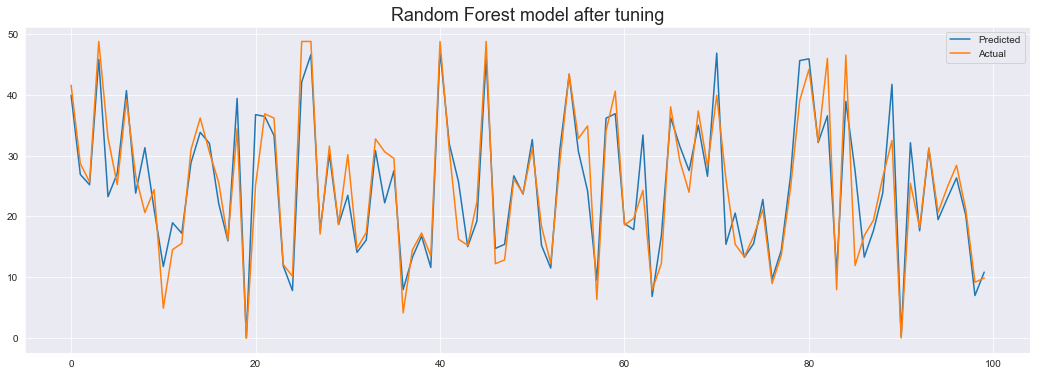

In [120]:
plt.figure(figsize=(18,6))
plt.plot((y_pred_test_rf_grid)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Random Forest model after tuning', fontsize=18)
plt.show()

In [121]:
features = features
importances = best_rf.feature_importances_
indices = np.argsort(importances)

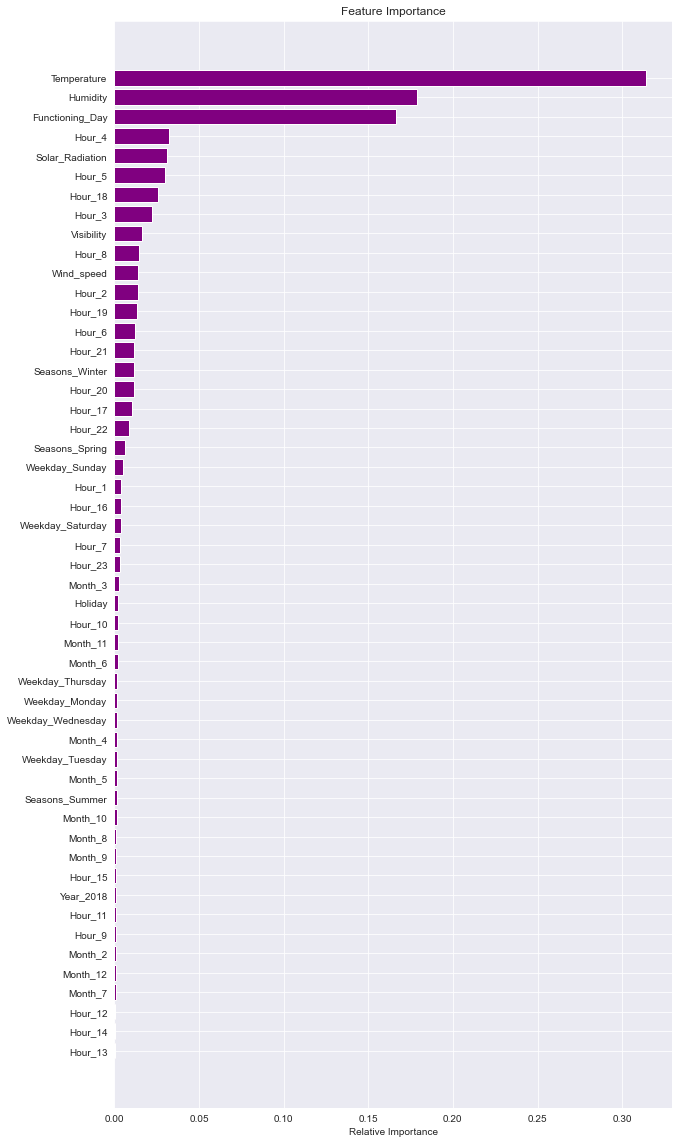

In [122]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning of the random forest algorithm, a slight decrease in performance has been observed.

### ML Model - Gradient Boost

In [123]:
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

y_pred_train_gb=gb_model.predict(X_train)
y_pred_test_gb=gb_model.predict(X_test)


#Training set
mae_train_gb=mean_absolute_error(y_train,y_pred_train_gb)
mse_train_gb=mean_squared_error(y_train,y_pred_train_gb)
rmse_train_gb=np.sqrt(mean_squared_error(y_train,y_pred_train_gb))
r2_score_train_gb=r2_score(y_train,y_pred_train_gb)
adj_r2_score_train_gb=1-(1-r2_score_train_gb)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))


#Test set
mae_test_gb=mean_absolute_error(y_test,y_pred_test_gb)
mse_test_gb=mean_squared_error(y_test,y_pred_test_gb)
rmse_test_gb=np.sqrt(mean_squared_error(y_test,y_pred_test_gb))
r2_score_test_gb=r2_score(y_test,y_pred_test_gb)
adj_r2_score_test_gb=1-(1-r2_score_test_gb)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

### Metrics on Train data

In [124]:
print('MAE: ',mae_train_gb)
print('MSE: ',mse_train_gb)
print('RMSE: ',rmse_train_gb)
print('R2_Score: ',r2_score_train_gb)
print('Adjusted R2: ',adj_r2_score_train_gb)

MAE:  3.5847666733537404
MSE:  23.188253839389233
RMSE:  4.815418345210438
R2_Score:  0.847556591750381
Adjusted R2:  0.8429832895028924


### Metrics on Test data

In [125]:
print('MAE: ',mae_test_gb)
print('MSE: ',mse_test_gb)
print('RMSE: ',rmse_test_gb)
print('R2_Score: ',r2_score_test_gb)
print('Adjusted R2: ',adj_r2_score_test_gb)

MAE:  3.761406123817685
MSE:  25.322330623761296
RMSE:  5.032129829779961
R2_Score:  0.8319977120452313
Adjusted R2:  0.8269576434065883


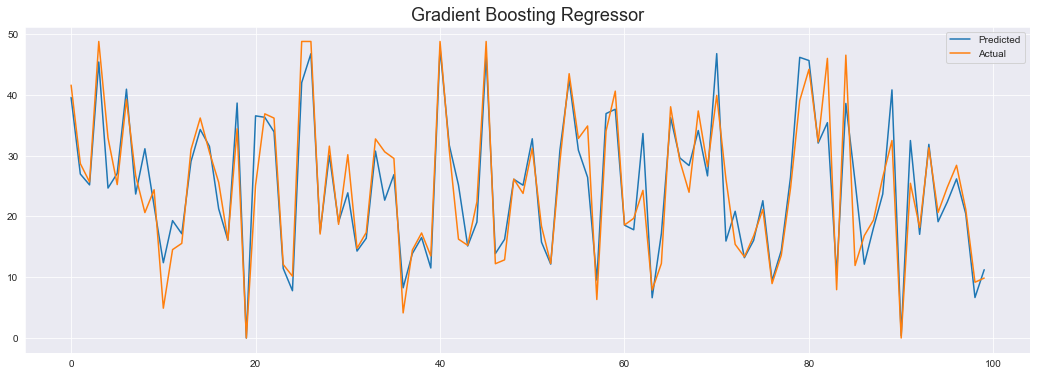

In [126]:
plt.figure(figsize=(18,6))
plt.plot((y_pred_test_rf)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Gradient Boosting Regressor', fontsize=18)
plt.show()

In [127]:
features = features
importances = gb_model.feature_importances_
indices = np.argsort(importances)

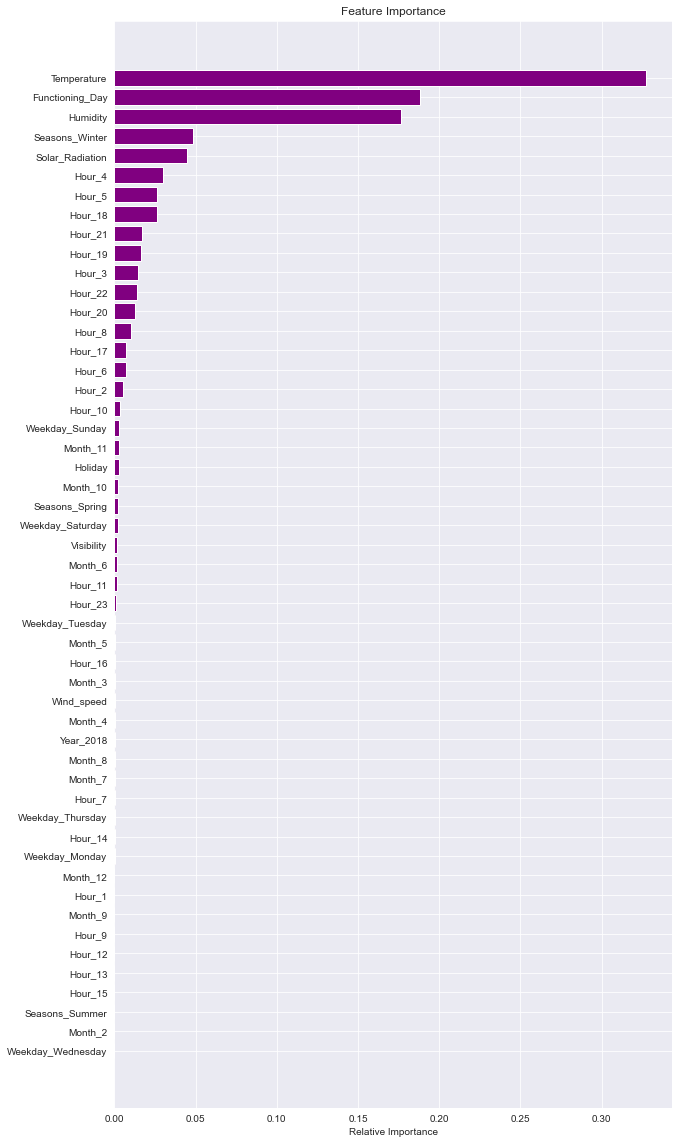

In [128]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

####  Cross- Validation & Hyperparameter Tuning

In [129]:
gb_model_tuning=GradientBoostingRegressor()

param_grid = {'n_estimators':[100],
             'min_samples_leaf':np.arange(20,23),
             'max_depth':np.arange(14,16)}         
grid_gb=GridSearchCV(estimator=gb_model_tuning,param_grid=param_grid,scoring='neg_root_mean_squared_error', cv=5)
grid_gb.fit(X_train,y_train)
gb_best_params = grid_gb.best_params_

In [130]:
gb_best_params

{'max_depth': 15, 'min_samples_leaf': 21, 'n_estimators': 100}

In [131]:
best_gb=GradientBoostingRegressor(max_depth=gb_best_params['max_depth'],
                              min_samples_leaf=gb_best_params['min_samples_leaf'])

In [132]:
best_gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=15, min_samples_leaf=21)

In [133]:
# Predict on model
y_pred_test_gb_grid = best_gb.predict(X_test)

In [134]:
mae_test_gb_grid=mean_absolute_error(y_test,y_pred_test_gb_grid)
mse_test_gb_grid=mean_squared_error(y_test,y_pred_test_gb_grid)
rmse_test_gb_grid=np.sqrt(mean_squared_error(y_test,y_pred_test_gb_grid))
r2_score_test_gb_grid=r2_score(y_test,y_pred_test_gb_grid)
adj_r2_score_test_gb_grid=1-(1-r2_score_test_gb_grid)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

In [135]:
print('MAE: ',mae_test_gb_grid)
print('MSE: ',mse_test_gb_grid)
print('RMSE: ',rmse_test_gb_grid)
print('R2_Score: ',r2_score_test_gb_grid)
print('Adjusted R2: ',adj_r2_score_test_gb_grid)

MAE:  2.437168567014153
MSE:  13.877661131329699
RMSE:  3.7252732961931394
R2_Score:  0.9079279527557941
Adjusted R2:  0.9051657913384679


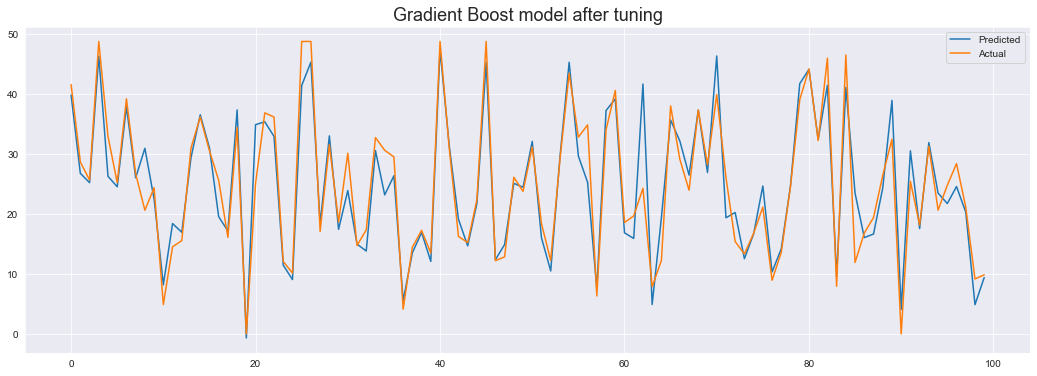

In [136]:
plt.figure(figsize=(18,6))
plt.plot((y_pred_test_gb_grid)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Gradient Boost model after tuning', fontsize=18)
plt.show()

In [137]:
features = features
importances = best_gb.feature_importances_
indices = np.argsort(importances)

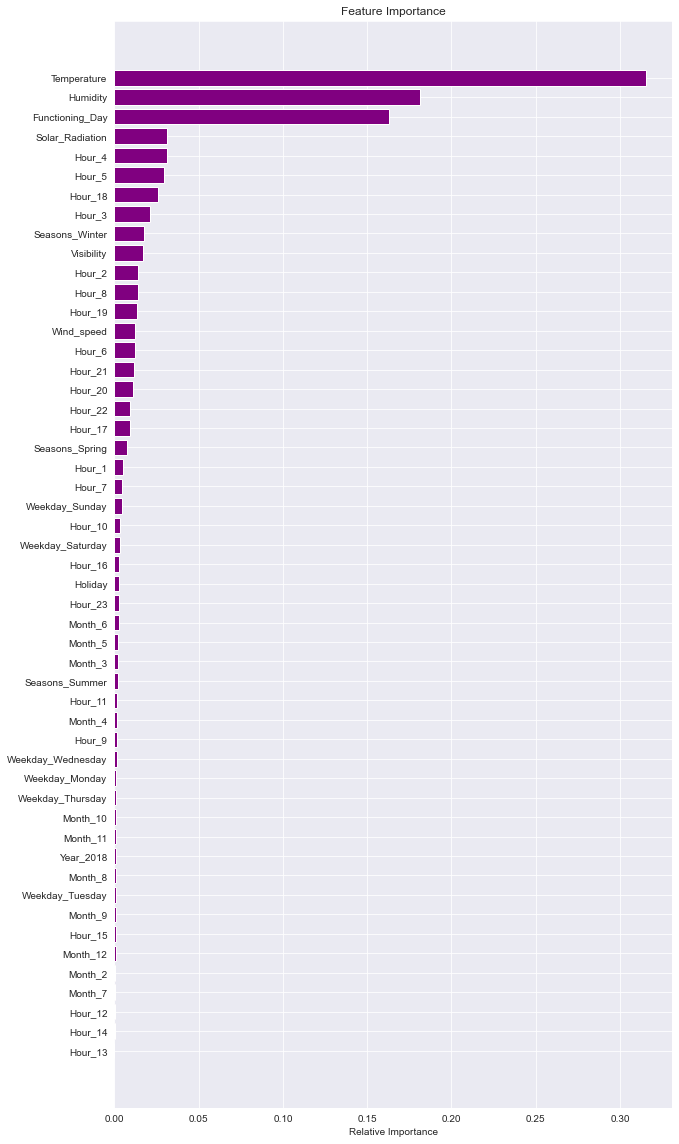

In [138]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning we have seen that there is increse in performance from 83% to 90%

### Test data

In [139]:
models=['Linear Regression','Ridge','Ridge after tuning','Lasso','Lasso after tuning',
        'Decision Tree','Decision Tree after tuning','Random Forest','Random Forest after tuning','Gradient Boosting Regressor',
        'Gradient Boosting after tuning']
test_data={"MAE":[mae_test_lr,mae_test_ridge,mae_test_ridge_grid,mae_test_lasso,mae_test_lasso_grid,
                  mae_test_dtr,mae_test_dtr_grid,mae_test_rf,mae_test_rf_grid,mae_test_gb,mae_test_gb_grid],
      "MSE":[mse_test_lr,mse_test_ridge,mse_test_ridge_grid,mse_test_lasso,mse_test_lasso_grid,mse_test_dtr,
             mse_test_dtr_grid,mse_test_rf,mse_test_rf_grid,mse_test_gb,mse_test_gb_grid],
      "RMSE":[rmse_test_lr,rmse_test_ridge,rmse_test_ridge_grid,rmse_test_lasso,rmse_test_lasso_grid,rmse_test_dtr,
              rmse_test_dtr_grid,rmse_test_rf,rmse_test_rf_grid,rmse_test_gb,rmse_test_gb_grid],
    'R2 score':[r2_score_test_lr,r2_score_test_ridge,r2_score_test_ridge_grid,r2_score_test_lasso,r2_score_test_lasso_grid,
                r2_score_test_dtr,r2_score_test_dtr_grid,r2_score_test_rf,r2_score_test_rf_grid,r2_score_test_gb,r2_score_test_gb_grid],
      "Adjusted R2":[adj_r2_score_test_lr,adj_r2_score_test_ridge,adj_r2_score_test_ridge_grid,
                     adj_r2_score_test_lasso,adj_r2_score_test_lasso_grid,adj_r2_score_test_dtr,adj_r2_score_test_dtr_grid,
                     adj_r2_score_test_rf,adj_r2_score_test_rf_grid,adj_r2_score_test_gb,adj_r2_score_test_gb_grid]}
result=pd.DataFrame(data=test_data,index=models)
result

MAE        MSE      RMSE  R2 score  \
Linear Regression               4.811928  39.790049  6.307935  0.736011   
Ridge                           4.811881  39.790319  6.307957  0.736009   
Ridge after tuning              4.811184  39.796382  6.308437  0.735969   
Lasso                           5.859756  57.572117  7.587629  0.618035   
Lasso after tuning              4.803955  39.747323  6.304548  0.736294   
Decision Tree                   3.643453  27.585903  5.252228  0.816980   
Decision Tree after tuning      3.260098  23.201481  4.816792  0.846069   
Random Forest                   2.669383  16.611287  4.075695  0.889792   
Random Forest after tuning      2.713032  16.934281  4.115128  0.887649   
Gradient Boosting Regressor     3.761406  25.322331  5.032130  0.831998   
Gradient Boosting after tuning  2.437169  13.877661  3.725273  0.907928   

                                Adjusted R2  
Linear Regression                  0.728091  
Ridge                              0.728089  
Ridge after tuning                 0.728048  
Lasso                              0.606576  
Lasso after tuning                 0.728383  
Decision Tree                      0.811489  
Decision Tree after tuning         0.841451  
Random Forest                      0.886485  
Random Forest after tuning         0.884278  
Gradient Boosting Regressor        0.826958  
Gradient Boosting after tuning     0.905166

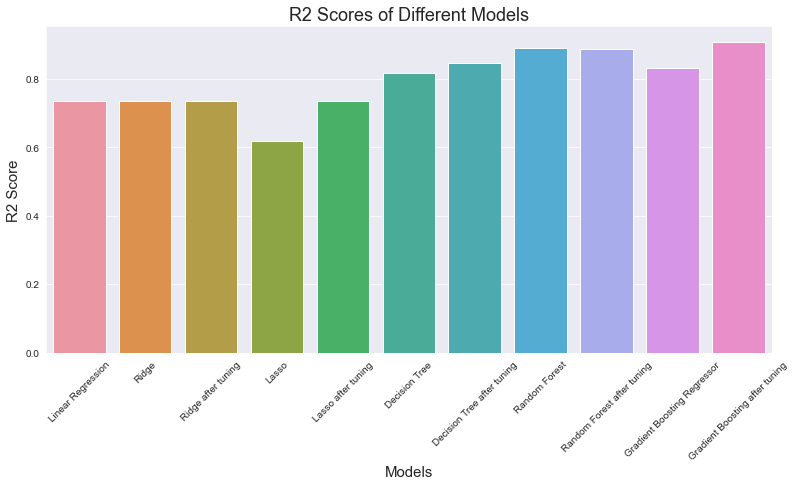

In [140]:
plt.figure(figsize=(13,6))
sns.barplot(x=result.index, y='R2 score', data=result)
plt.xlabel('Models',fontsize=15)
plt.ylabel('R2 Score',fontsize=15)
plt.title('R2 Scores of Different Models',fontsize=18)
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Based on the assessment of all the models, we have chosen the R2 score as our evaluation metric. This metric serves as an excellent indicator for gauging model accuracy and is instrumental in assessing the model's feasibility.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After running several models, including linear regression, decision tree, random forest, and gradient boosting, we have chosen the tuned gradient boosting regressor as our final selection. This decision is based on the model's performance, achieving an accuracy of 90%

# **Conclusion**

- Demand is lower during the winter season.
- Highest demand in June.
- High demand in the morning and evening.
- Multicollinearity has been observed between the temperature and dew point temperature variables.
- After conducting various modeling techniques, including linear regression, decision tree, random forest, and gradient boosting, we achieved the highest accuracy of 90% using gradient boosting.